# Heart Disease

## Background
Penyakit jantung adalah penyebab utama kematian di banyak negara. Identifikasi faktor-faktor risiko dan pemahaman mendalam tentang data pasien yang terkena penyakit jantung penting untuk pembuatan model prediksi penyakit jantung yang memiliki performa optimal.


## Goals
Tujuan dari analisis ini adalah untuk memahami lebih baik faktor-faktor yang berkontribusi terhadap penyakit jantung.
Mengidentifikasi pola atau tren dalam data yang dapat membantu pembuatan model yang mampu dengan baik membedakan orang-orang dalam keadaan sehat dan penderita penyakit jantung melalui data-data pengukurannya.


## Dataset
Dataset berasal dari Kaggle dari URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
Terdiri dari 14 atribut. Dengan targetnya mengacu pada keberadaan penyakit jantung pasien. Target dengan kondiisi 0 adalah tidak ada penyakit dan 1 adalah punya penyakit. Dataset terdiri dair 1025 record.


#Data Pre-Processing
By Rofik

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/DATASET/heart.csv')

##Deskripsi fitur fitur yang ada dalam dataset.

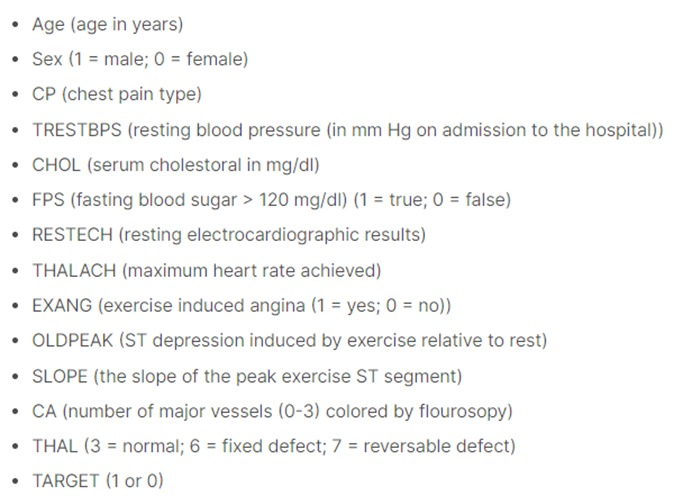

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Terdapat 1024 record data, dan 14 fitur yang masing-maisng bertipe data int dan hanyak oldpeak yang bertipe data float

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Memeriksa Missing Value

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Tidak ditemukan data yang missing value. Ini artinya ada value disetiap baris dan kolom pada datanya

##Memeriksa Data Duplikat

In [9]:
df.duplicated().sum()

723

Terdapat sebanyak 723 data yang duplikat

In [10]:
duplicates = df[df.duplicated()]
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [11]:
duplicate_indices = df[df.duplicated(keep=False)].sort_values(by=['age']).index
sorted_duplicate_data = df.loc[duplicate_indices]
sorted_duplicate_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
965,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


Jika dilihat lebih mendetail data duplikatnya, ternyata dalam 1 baris data bisa sangat identik dengan yang lainnya (duplikat per baris). Nilai antar kolom di suatu baris sangat sama.
Apabila dibiarkan maka hanya akan membuat kelebihan informasi, dan waktu komputasinya semakin lama. Yang mana ini juga dapat menyebabkan model berperforma tidak optimal.

Dilakukan penghapusan data duplikat dan hanya menyisakan 1 data yang pertama, hingga tidak membuat suatu baris tersebut tidak duplikat berbeda dengan baris lainnya)

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Setelah di drop/dihapus dari duplikasi, data tersissa 302 record.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


#Deteksi Outlier

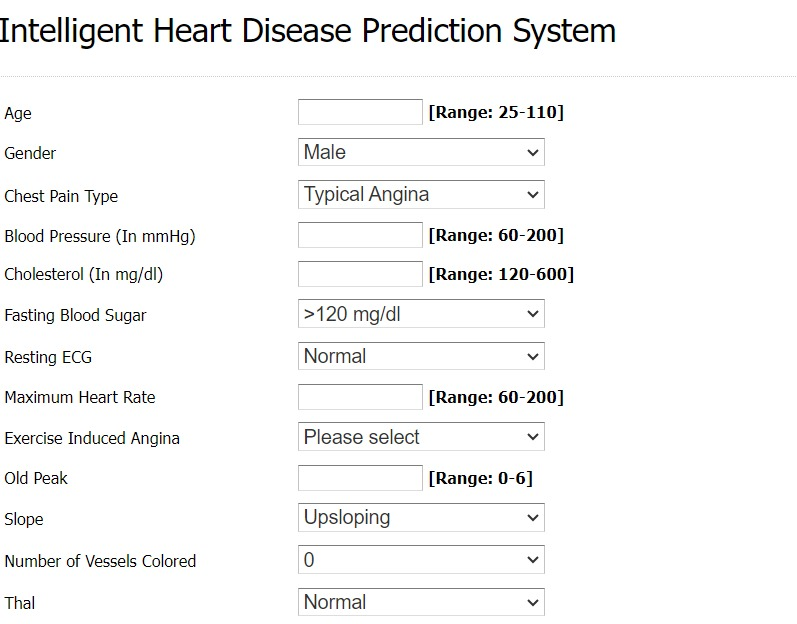

##Identifikasi outlier pada fitur age

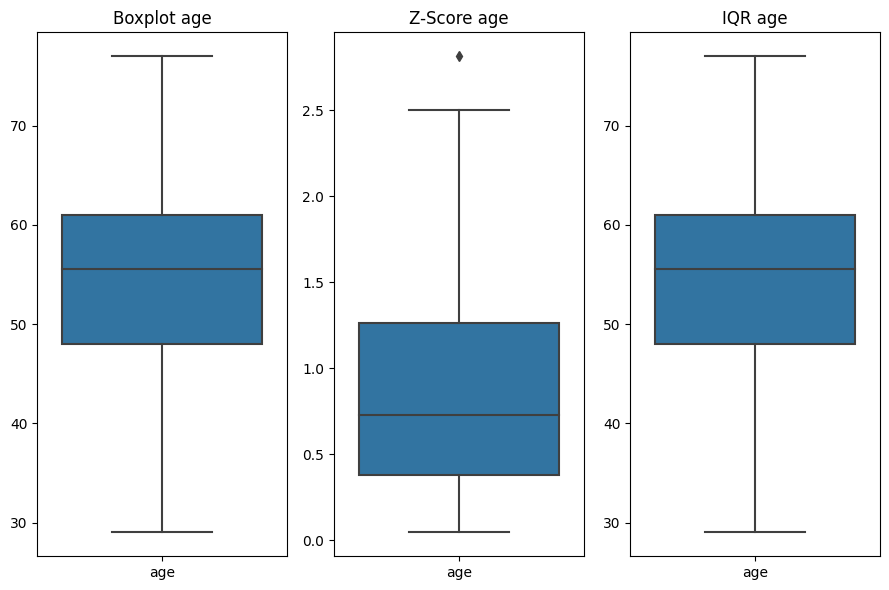

In [15]:
# Fitur yang ingin dianalisis
feature = 'age'

# Membuat gambar untuk fitur 'age'
plt.figure(figsize=(9, 6))

# Boxplot untuk fitur 'age'
plt.subplot(1, 3, 1)
sns.boxplot(data=df[[feature]])
plt.title(f'Boxplot {feature}')

# Boxplot untuk Z-Score 'age'
plt.subplot(1, 3, 2)
z_scores_age = np.abs(stats.zscore(df[feature]))
sns.boxplot(data=pd.DataFrame(z_scores_age, columns=[feature]))
plt.title(f'Z-Score {feature}')

# Boxplot untuk IQR 'age'
plt.subplot(1, 3, 3)
Q1_age = df[feature].quantile(0.25)
Q3_age = df[feature].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
iqr_values_age = (df[feature] < lower_bound_age) | (df[feature] > upper_bound_age)
sns.boxplot(data=df[(df[feature] >= lower_bound_age) & (df[feature] <= upper_bound_age)][[feature]])
plt.title(f'IQR {feature}')

plt.tight_layout()
plt.show()

Jika dilihat dari bloxpot age tidak ada outlier, begitu juga dalam IQRnya tidak ditemukan data poin. Namun di Z-score terlihat ada data poin

Dilakukan pengecekan lagi untuk melihat deskripsi statistik dari age, z-score age, dan IQR age

In [16]:
# Menghitung Z-Score untuk 'age'
z_scores_age = np.abs(stats.zscore(df['age']))

# Menghitung IQR untuk 'age'
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Membuat DataFrame baru untuk statistik 'age', 'age Z-Score', dan 'age IQR'
statistics = pd.DataFrame({
    'Age': df['age'],
    'Age Z-Score': z_scores_age
})

# Menambahkan kolom 'IQR' ke DataFrame
statistics['IQR'] = IQR_age

# Menampilkan statistik ringkas
statistics.describe()

,Age,Age Z-Score,IQR
count,302.00000,302.000000,302.0
mean,54.42053,0.821959,13.0
std,9.04797,0.570491,0.0
min,29.00000,0.046555,13.0
25%,48.00000,0.378671,13.0
50%,55.50000,0.728383,13.0
75%,61.00000,1.264315,13.0
max,77.00000,2.814192,13.0


Terlihat bahwa Nilai Z-score maksimum adalah 2.814192. Yang mana nilai ini kurang dari 3. Secara umum, jika nilai Z-Score lebih besar dari 3 atau lebih kecil dari -3, itu dianggap sebagai outlier. Maka berdasarkan z-score tidak ada outlier

Untuk IQRnya menunjukkan rentang data yang konstan yaitu sebesar 13.0, yang mana dari ini bisa disimpulkan bahwa di fitur age tidak ada outliernya. Berdasarkan gambar referensi juga bahwa rentang usia bisa mencapai 110. Jadi untuk nilai max di data ini 77 merupakan bukan outlier

##Identifikasi outlier pada fitur trestbps

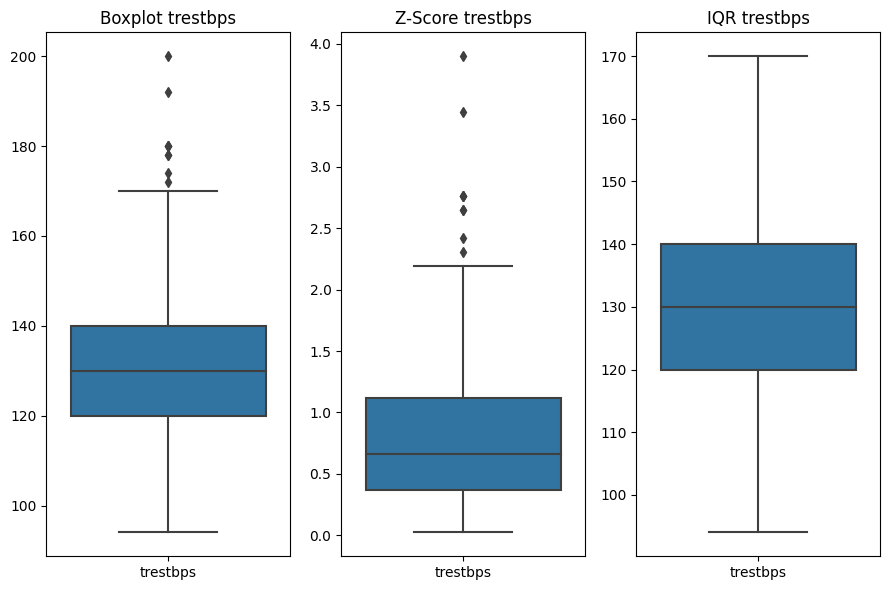

In [17]:
# Fitur yang ingin dianalisis
feature = 'trestbps'

# Membuat gambar untuk fitur 'trestbps'
plt.figure(figsize=(9, 6))

# Boxplot untuk fitur 'trestbpse'
plt.subplot(1, 3, 1)
sns.boxplot(data=df[[feature]])
plt.title(f'Boxplot {feature}')

# Boxplot untuk Z-Score 'trestbps'
plt.subplot(1, 3, 2)
z_scores_trestbps = np.abs(stats.zscore(df[feature]))
sns.boxplot(data=pd.DataFrame(z_scores_trestbps, columns=[feature]))
plt.title(f'Z-Score {feature}')

# Boxplot untuk IQR 'trestbps'
plt.subplot(1, 3, 3)
Q1_trestbps = df[feature].quantile(0.25)
Q3_trestbps = df[feature].quantile(0.75)
IQR_trestbps = Q3_trestbps - Q1_trestbps
lower_bound_trestbps = Q1_trestbps - 1.5 * IQR_trestbps
upper_bound_trestbps = Q3_trestbps + 1.5 * IQR_trestbps
iqr_values_trestbps = (df[feature] < lower_bound_trestbps) | (df[feature] > upper_bound_trestbps)
sns.boxplot(data=df[(df[feature] >= lower_bound_trestbps) & (df[feature] <= upper_bound_trestbps)][[feature]])
plt.title(f'IQR {feature}')

plt.tight_layout()
plt.show()

Jika dilihat pada gambar, terdapat data poin jika kita membuat bloxpot untuk fitur trestbps. Saat dicek menggunakan z-score juga ditemukan data poin di nilai-nilai yang tinggi. Namun IQR tidak menunjukkan adanya outlier.

Dilakukan pengecekan lagi untuk melihat deskripsi statistik dari trestbps, z-score trestbps, dan IQR trestbps

In [18]:
df['trestbps'].max()

200

In [19]:
# Menghitung Z-Score untuk 'tretstbps'
z_scores_trestbps = np.abs(stats.zscore(df['trestbps']))

# Menghitung IQR untuk 'age'
Q1_trestbps = df['trestbps'].quantile(0.25)
Q3_trestbps = df['trestbps'].quantile(0.75)
IQR_trestbps = Q3_trestbps - Q1_trestbps

# Membuat DataFrame baru untuk statistik 'trestbps', 'trestbps Z-Score', dan 'trestbps IQR'
statistics = pd.DataFrame({
    'trestbps': df['trestbps'],
    'trestbps Z-Score': z_scores_trestbps
})

# Menambahkan kolom 'IQR' ke DataFrame
statistics['IQR'] = IQR_trestbps

# Menampilkan statistik ringkas
statistics.describe()

,trestbps,trestbps Z-Score,IQR
count,302.000000,302.000000,302.0
mean,131.602649,0.772395,20.0
std,17.563394,0.636197,0.0
min,94.000000,0.022661,20.0
25%,120.000000,0.364848,20.0
50%,130.000000,0.661712,20.0
75%,140.000000,1.117961,20.0
max,200.000000,3.900776,20.0


Terlihat bahwa Nilai Z-score maksimum adalah 3.90. Yang mana nilai ini lebih dari 3. Secara umum, jika nilai Z-Score lebih besar dari 3 atau lebih kecil dari -3, itu dianggap sebagai outlier. Maka berdasarkan z-score terdapat outlier pada data

Untuk IQRnya menunjukkan rentang data yang konstan yaitu sebesar 20.0, yang mana dari ini bisa disimpulkan bahwa di fitur age tidak ada outliernya.

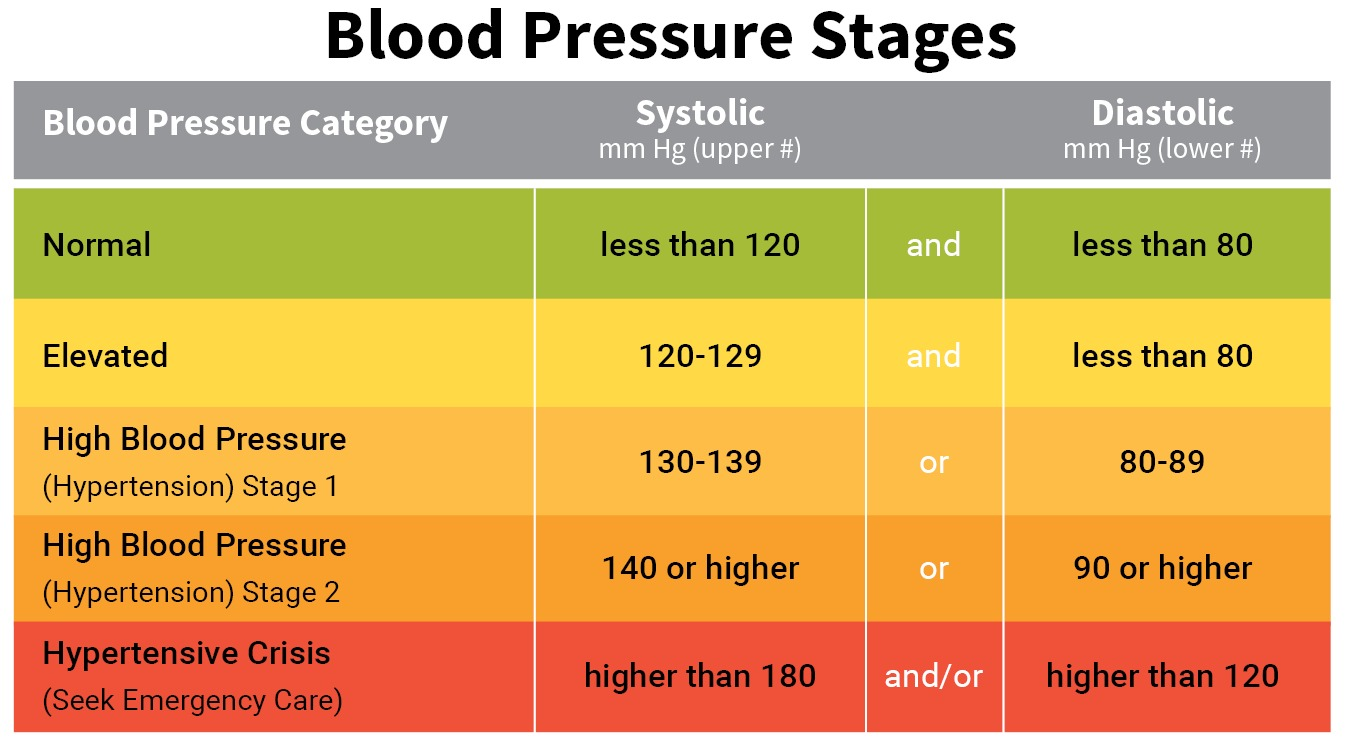

Karena dalam kasus ini merupakan persoalan Heart Disease, maka bisa saja ada orang yang memiliki trestbps sebanyak yang ada dalam outlier tersebut. Seperti pada gambar bahwa ada orang dalam kondisi Hypertensive Crisis yang mana trstbps lebih dari 180.

In [20]:
# Mendapatkan data terindikasi outlier pada fitur 'trestbps'
Q1_trestbps = df['trestbps'].quantile(0.25)
Q3_trestbps = df['trestbps'].quantile(0.75)
IQR_trestbps = Q3_trestbps - Q1_trestbps
lower_bound_trestbps= Q1_trestbps - 1.5 * IQR_trestbps
upper_bound_trestbps= Q3_trestbps + 1.5 * IQR_trestbps

outlier_data_trestbps = df[(df['trestbps'] < lower_bound_trestbps) | (df['trestbps'] > upper_bound_trestbps)]

# Menampilkan data terindikasi outlier
outlier_data_trestbps


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
343,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
396,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


Dan jika dilihat ternyata yang memiliki tekanan darah yang tinggi, adalah orang yang berusia tua. Berdasarkan halodoc, orang tua cenderung mengalami tekanan darah tinggi.
Dan berdasarkan gambar paling atas, range untuk trestbps adalah 60-200. Maka data-data tersebut tidak dianggap sebagai outlier

##Identifikasi outlier pada fitur chol

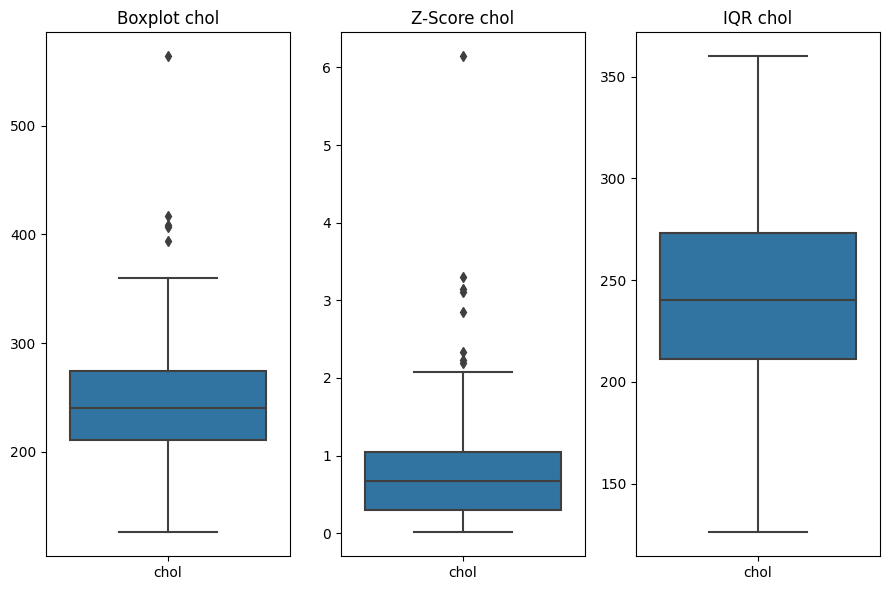

In [21]:
# Fitur yang ingin dianalisis
feature = 'chol'

# Membuat gambar untuk fitur 'chol'
plt.figure(figsize=(9, 6))

# Boxplot untuk fitur 'chol'
plt.subplot(1, 3, 1)
sns.boxplot(data=df[[feature]])
plt.title(f'Boxplot {feature}')

# Boxplot untuk Z-Score 'chol'
plt.subplot(1, 3, 2)
z_scores_chol = np.abs(stats.zscore(df[feature]))
sns.boxplot(data=pd.DataFrame(z_scores_chol, columns=[feature]))
plt.title(f'Z-Score {feature}')

# Boxplot untuk IQR 'chol'
plt.subplot(1, 3, 3)
Q1_chol = df[feature].quantile(0.25)
Q3_chol = df[feature].quantile(0.75)
IQR_chol = Q3_chol - Q1_chol
lower_bound_chol = Q1_chol - 1.5 * IQR_chol
upper_bound_chol = Q3_chol + 1.5 * IQR_chol
iqr_values_chol = (df[feature] < lower_bound_chol) | (df[feature] > upper_bound_chol)
sns.boxplot(data=df[(df[feature] >= lower_bound_chol) & (df[feature] <= upper_bound_chol)][[feature]])
plt.title(f'IQR {feature}')

plt.tight_layout()
plt.show()

Jika dilihat pada gambar, terdapat data poin jika kita membuat bloxpot untuk fitur chol. Saat dicek menggunakan z-score juga ditemukan data poin di nilai-nilai yang tinggi. Namun IQR tidak menunjukkan adanya outlier.

Dilakukan pengecekan lagi untuk melihat deskripsi statistik dari chol, z-score chol, dan IQR chol

In [22]:
# Menghitung Z-Score untuk 'chol'
z_scores_chol = np.abs(stats.zscore(df['chol']))

# Menghitung IQR untuk 'chol'
Q1_chol = df['chol'].quantile(0.25)
Q3_chol = df['chol'].quantile(0.75)
IQR_chol = Q3_chol - Q1_chol

# Membuat DataFrame baru untuk statistik 'chol', 'chol Z-Score', dan 'chol IQR'
statistics = pd.DataFrame({
    'chol': df['chol'],
    'chol Z-Score': z_scores_chol
})

# Menambahkan kolom 'IQR' ke DataFrame
statistics['IQR'] = IQR_chol

# Menampilkan statistik ringkas
statistics.describe()

,chol,chol Z-Score,IQR
count,302.000000,302.000000,302.00
mean,246.500000,0.759309,63.75
std,51.753489,0.651810,0.00
min,126.000000,0.009677,63.75
25%,211.000000,0.299994,63.75
50%,240.500000,0.667728,63.75
75%,274.750000,1.049978,63.75
max,564.000000,6.145034,63.75


Terlihat bahwa Nilai Z-score maksimum adalah 6.15. Yang mana nilai ini lebih dari 3. Secara umum, jika nilai Z-Score lebih besar dari 3 atau lebih kecil dari -3, itu dianggap sebagai outlier. Maka berdasarkan z-score terdapat outlier pada data

Untuk IQRnya menunjukkan rentang data yang konstan yaitu sebesar 63.75, yang mana dari ini bisa disimpulkan bahwa di fitur chol tidak ada outliernya. sdnya 0

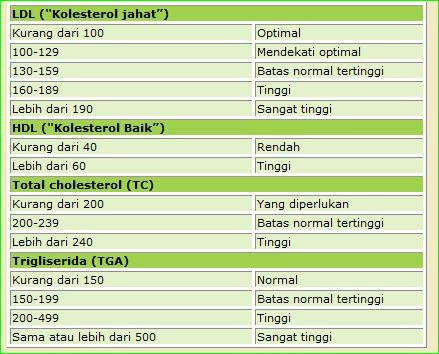

In [23]:
# Mendapatkan data terindikasi outlier pada fitur 'chol'
Q1_chol = df['chol'].quantile(0.25)
Q3_chol = df['chol'].quantile(0.75)
IQR_chol = Q3_chol - Q1_chol
lower_bound_chol = Q1_chol - 1.5 * IQR_chol
upper_bound_chol = Q3_chol + 1.5 * IQR_chol

outlier_data_chol = df[(df['chol'] < lower_bound_chol) | (df['chol'] > upper_bound_chol)]

# Menampilkan data terindikasi outlier
outlier_data_chol


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


Berdasarkan gambar maka mungkin saja orang memiliki kolestrol dengan nilai-nilai mencapai tersebut. Dan berdasarkan IQR juga, maka dianggap tidak ada outlier.
Pada gambar paling atas juga range untuk chol adalah 120-600. Maka data-data tersebut tidak dianggap sebagai outlier.

##Identifikasi outlier pada fitur thalach

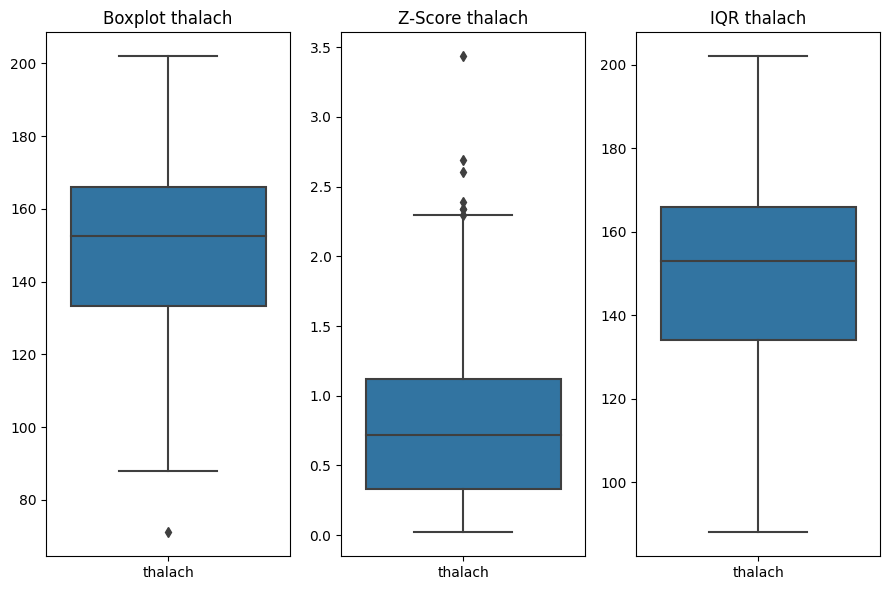

In [24]:
# Fitur yang ingin dianalisis
feature = 'thalach'

# Membuat gambar untuk fitur 'thalach
plt.figure(figsize=(9, 6))

# Boxplot untuk fitur 'thalach'
plt.subplot(1, 3, 1)
sns.boxplot(data=df[[feature]])
plt.title(f'Boxplot {feature}')

# Boxplot untuk Z-Score 'thalach'
plt.subplot(1, 3, 2)
z_scores_thalach = np.abs(stats.zscore(df[feature]))
sns.boxplot(data=pd.DataFrame(z_scores_thalach, columns=[feature]))
plt.title(f'Z-Score {feature}')

# Boxplot untuk IQR 'thalach'
plt.subplot(1, 3, 3)
Q1_thalach = df[feature].quantile(0.25)
Q3_thalach = df[feature].quantile(0.75)
IQR_thalach = Q3_thalach - Q1_thalach
lower_bound_thalach = Q1_thalach - 1.5 * IQR_thalach
upper_bound_thalach = Q3_thalach + 1.5 * IQR_thalach
iqr_values_thalach = (df[feature] < lower_bound_thalach) | (df[feature] > upper_bound_thalach)
sns.boxplot(data=df[(df[feature] >= lower_bound_thalach) & (df[feature] <= upper_bound_thalach)][[feature]])
plt.title(f'IQR {feature}')

plt.tight_layout()
plt.show()

Jika dilihat pada gambar, terdapat data poin jika kita membuat bloxpot untuk fitur thalach pada nilai minimum. Saat dicek menggunakan z-score juga ditemukan data poin di nilai-nilai yang tinggi. Namun IQR tidak menunjukkan adanya outlier.

Dilakukan pengecekan lagi untuk melihat deskripsi statistik dari chol, z-score thalach, dan IQR thalach

In [25]:
# Menghitung Z-Score untuk 'thalach'
z_scores_thalach = np.abs(stats.zscore(df['thalach']))

# Menghitung IQR untuk 'thalach'
Q1_thalach = df['thalach'].quantile(0.25)
Q3_thalach = df['thalach'].quantile(0.75)
IQR_thalach = Q3_thalach - Q1_thalach

# Membuat DataFrame baru untuk statistik 'thalach', 'thalach Z-Score', dan 'thalach IQR'
statistics = pd.DataFrame({
    'thalach': df['thalach'],
    'thalach Z-Score': z_scores_thalach
})

# Menambahkan kolom 'IQR' ke DataFrame
statistics['IQR'] = IQR_thalach
# Menampilkan statistik ringkas
statistics.describe()

,thalach,thalach Z-Score,IQR
count,302.000000,302.000000,302.00
mean,149.569536,0.808115,32.75
std,22.903527,0.590003,0.00
min,71.000000,0.018826,32.75
25%,133.250000,0.331045,32.75
50%,152.500000,0.718568,32.75
75%,166.000000,1.116734,32.75
max,202.000000,3.436149,32.75


Terlihat bahwa Nilai Z-score maksimum adalah 3.44. Yang mana nilai ini lebih dari 3. Secara umum, jika nilai Z-Score lebih besar dari 3 atau lebih kecil dari -3, itu dianggap sebagai outlier. Maka berdasarkan z-score terdapat outlier pada data

Untuk IQRnya menunjukkan rentang data yang konstan yaitu sebesar 32.75, yang mana dari ini bisa disimpulkan bahwa di fitur thalach tidak ada outliernya, apabila dilihat dengan IQR. stdnya 0

In [26]:
# Mendapatkan data outlier pada fitur 'thalach'
Q1_thalach = df['thalach'].quantile(0.25)
Q3_thalach = df['thalach'].quantile(0.75)
IQR_thalach = Q3_thalach - Q1_thalach
lower_bound_thalach = Q1_thalach - 1.5 * IQR_thalach
upper_bound_thalach = Q3_thalach + 1.5 * IQR_thalach

outlier_data_thalach = df[(df['thalach'] < lower_bound_thalach) | (df['thalach'] > upper_bound_thalach)]

# Menampilkan data outlier
outlier_data_thalach


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


Dengan usia 67 tahun, detak jantung maksimum 71, terbilang sangat kecil.
Namun berdasarkan gambar paling atas, range untuk thalach adalah 60-200. Maka diputuskan bahwa data tersebut bukan outlier.

##Deteksi outlier pada fitur oldpeak

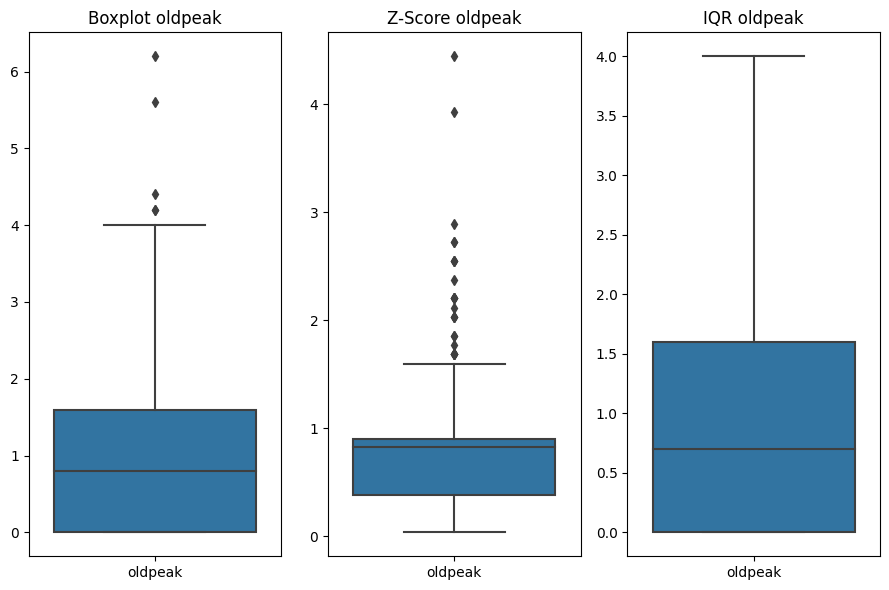

In [27]:
# Fitur yang ingin dianalisis
feature = 'oldpeak'

# Membuat gambar untuk fitur 'oldpeak'
plt.figure(figsize=(9, 6))

# Boxplot untuk fitur 'age'
plt.subplot(1, 3, 1)
sns.boxplot(data=df[[feature]])
plt.title(f'Boxplot {feature}')

# Boxplot untuk Z-Score 'age'
plt.subplot(1, 3, 2)
z_scores_oldpeak = np.abs(stats.zscore(df[feature]))
sns.boxplot(data=pd.DataFrame(z_scores_oldpeak, columns=[feature]))
plt.title(f'Z-Score {feature}')

# Boxplot untuk IQR 'oldpeak'
plt.subplot(1, 3, 3)
Q1_oldpeak = df[feature].quantile(0.25)
Q3_oldpeak = df[feature].quantile(0.75)
IQR_oldpeak = Q3_oldpeak - Q1_oldpeak
lower_bound_oldpeak = Q1_oldpeak - 1.5 * IQR_oldpeak
upper_bound_oldpeak = Q3_oldpeak + 1.5 * IQR_oldpeak
iqr_values_oldpeak = (df[feature] < lower_bound_oldpeak) | (df[feature] > upper_bound_oldpeak)
sns.boxplot(data=df[(df[feature] >= lower_bound_oldpeak) & (df[feature] <= upper_bound_oldpeak)][[feature]])
plt.title(f'IQR {feature}')

plt.tight_layout()
plt.show()

Jika dilihat pada gambar, terdapat data poin jika kita membuat bloxpot untuk fitur oldpeak pada nilai maksimum. Saat dicek menggunakan z-score juga ditemukan data poin di nilai-nilai yang tinggi. Namun IQR tidak menunjukkan adanya outlier.

Dilakukan pengecekan lagi untuk melihat deskripsi statistik dari oldpeak, z-score oldpeak, dan IQR oldpeak

In [28]:
# Menghitung Z-Score untuk 'oldpeak'
z_scores_oldpeak = np.abs(stats.zscore(df['oldpeak']))

# Menghitung IQR untuk 'age'
Q1_oldpeak = df['oldpeak'].quantile(0.25)
Q3_oldpeak = df['oldpeak'].quantile(0.75)
IQR_oldpeak = Q3_oldpeak - Q1_oldpeak

# Membuat DataFrame baru untuk statistik 'oldpeak', 'trestbps Z-Score', dan 'trestbps IQR'
statistics = pd.DataFrame({
    'oldpeak': df['oldpeak'],
    'oldpeak Z-Score': z_scores_oldpeak
})

# Menambahkan kolom 'IQR' ke DataFrame
statistics['IQR'] = IQR_oldpeak

# Menampilkan statistik ringkas
statistics.describe()

,oldpeak,oldpeak Z-Score,IQR
count,302.000000,302.000000,3.020000e+02
mean,1.043046,0.801910,1.600000e+00
std,1.161452,0.598437,2.224131e-16
min,0.000000,0.037124,1.600000e+00
25%,0.000000,0.382092,1.600000e+00
50%,0.800000,0.825296,1.600000e+00
75%,1.600000,0.899544,1.600000e+00
max,6.200000,4.447460,1.600000e+00


Terlihat bahwa Nilai Z-score maksimum adalah 4.45. Yang mana nilai ini lebih dari 3. Secara umum, jika nilai Z-Score lebih besar dari 3 atau lebih kecil dari -3, itu dianggap sebagai outlier. Maka berdasarkan z-score terdapat outlier pada data

Untuk IQRnya menunjukkan rentang data yang konstan yaitu sebesar 1.60, yang mana dari ini bisa disimpulkan bahwa di fitur oldpeak tidak ada outliernya, apabila dilihat dengan IQR. stdnya 0, z-score dipertimbangakn untuk mengukur ada tidaknya outlier.

In [29]:
# Mendapatkan data outlier pada fitur 'oldpeak'
Q1_oldpeak = df['oldpeak'].quantile(0.25)
Q3_oldpeak = df['oldpeak'].quantile(0.75)
IQR_oldpeak = Q3_oldpeak - Q1_oldpeak
lower_bound_oldpeak = Q1_oldpeak - 1.5 * IQR_oldpeak
upper_bound_oldpeak = Q3_oldpeak + 1.5 * IQR_oldpeak

outlier_data_oldpeak = df[(df['oldpeak'] < lower_bound_oldpeak) | (df['oldpeak'] > upper_bound_oldpeak)]

# Menampilkan data outlier
outlier_data_oldpeak


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


Ganti nilai oldepak yang 6.20 dengan median. Karena rentang oldpeak adalah 0 hingga 6

In [30]:
# Ganti nilai 'oldpeak' yang sama dengan 6.20 dengan nilai median
median_oldpeak = df['oldpeak'].median()
df.loc[df['oldpeak'] == 6.20, 'oldpeak'] = median_oldpeak


In [31]:
df['oldpeak'].max()

5.6

##Melihat apakah dataset seimbang atau tidak

<Axes: xlabel='target', ylabel='count'>

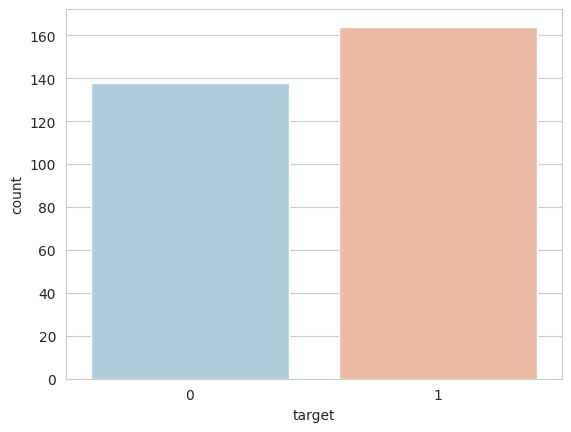

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df, palette='RdBu_r')

In [33]:
# Melihat jumlah penderita penyakit jantung dan tidak
sick_counts = df['target'].value_counts()
print('Jumlah Orang Keadaan Sehat:', sick_counts[0])
print('Jumlah Penderita Heart Disaese:', sick_counts[1])

Jumlah Orang Keadaan Sehat: 138
Jumlah Penderita Heart Disaese: 164


##Melihat Korelasi Antar Fitur

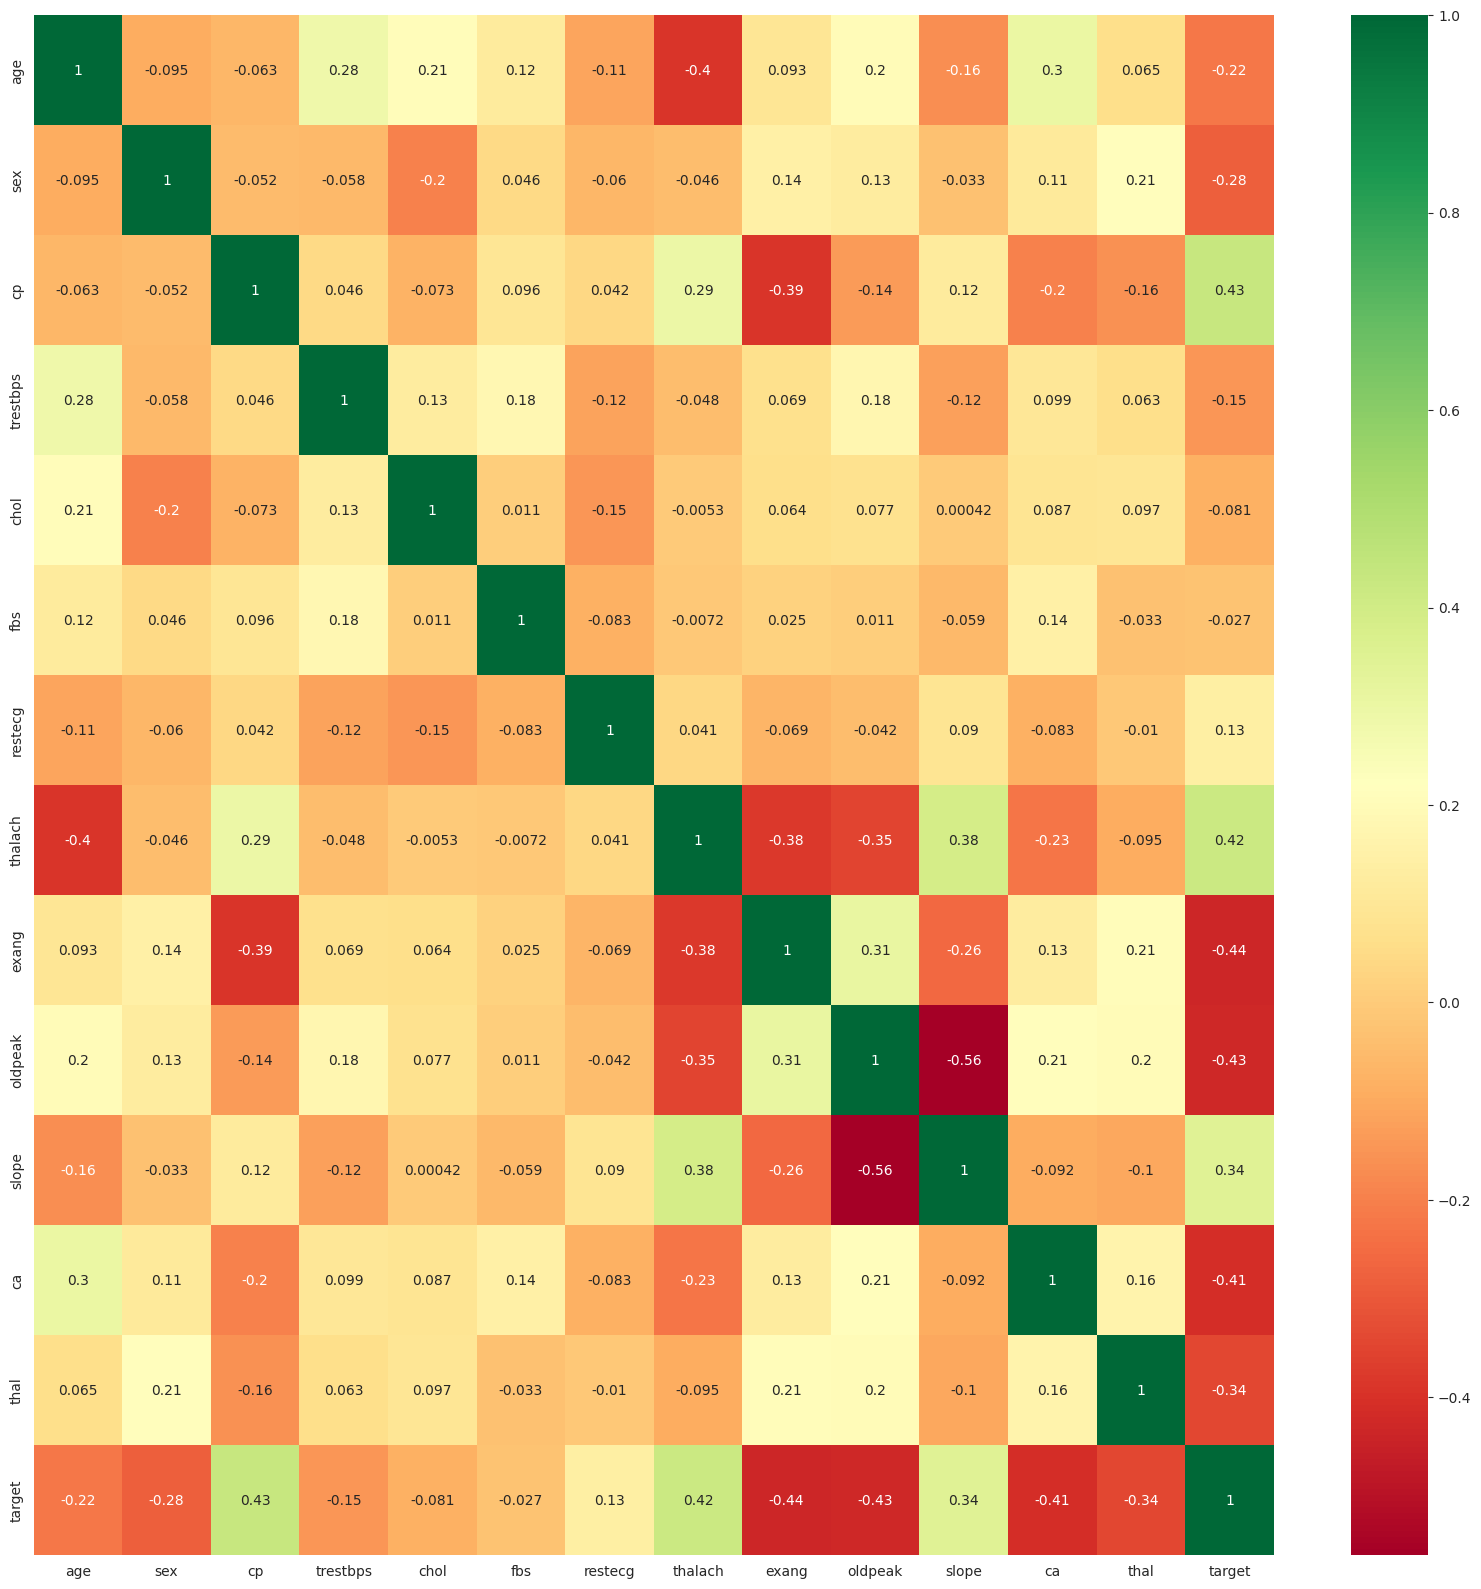

In [34]:
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
g = sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="RdYlGn")

Fitur yang paling berpengaruh terhadap target adalah
Pengaruh positif (urutan dari yang paling kuat) = cp, thalach, dan slope.
sedangkan Penagruh negatif (berkebalikan, dari urutan terkuat) = exang, oldpeak, ca

Melihat banyak kelompok usia

In [35]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
44    11
60    11
56    11
62    11
41    10
64    10
67     9
63     9
42     8
43     8
65     8
53     8
61     8
45     8
55     8
50     7
46     7
66     7
48     7
49     5
47     5
68     4
70     4
35     4
39     4
69     3
40     3
71     3
37     2
38     2
34     2
76     1
29     1
77     1
74     1
Name: age, dtype: int64

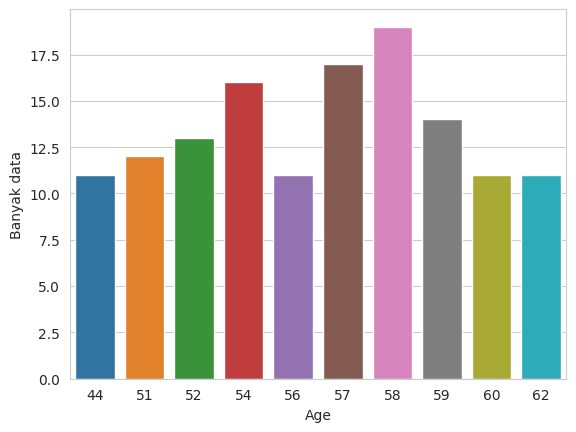

In [36]:
sns.barplot(x=df['age'].value_counts()[:10].index,y=df['age'].value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Banyak data')
plt.show()

In [37]:
nilaiMin= df['age'].min()
nilaiMax=df['age'].max()
nilaiMean=round(df['age'].mean(), 2)
print("Usia Minimum: ", nilaiMin)
print("Usia Maximum: ", nilaiMax)
print("Rata-rata Usia: ", nilaiMean)

Usia Minimum:  29
Usia Maximum:  77
Rata-rata Usia:  54.42


Dataset diukur dari orang yang rentang usianya 29 hingga 77 tahun. Dan rata-rata usianya adalah 54 tahun

Perbandingan jumlah data berdasarkan gender dengan targetnya.

<Axes: xlabel='sex', ylabel='count'>

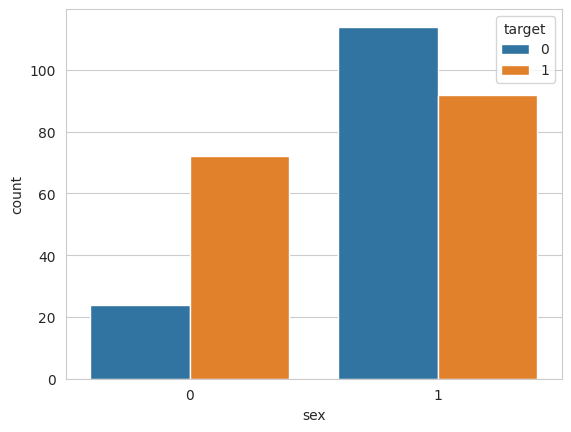

In [38]:
sns.countplot(data=df, x='sex', hue='target')

Berdasarkan distribusi gambar diketahui bahwa jumlah perempuan lebih sedikit dibanding laki-laki.
Bagitu juga untuk penderita herat disease laki-laki lebih banyak dibanding perempuan

In [39]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

0 = female
dan 1 = male. Kebanyakan data yang ada dalam dataset bersumber dari pengukuran laki-laki.

In [40]:
#Presentase gender dalam dataset
value_counts = df['sex'].value_counts()
total_data = len(df)
presentase = (value_counts / total_data) * 100
#presentase dalam %
for value, percent in presentase.items():
    print(f"{value}   {percent:.2f}%")

1   68.21%
0   31.79%


Presentase gender (sex) dengan targetnya

<Axes: xlabel='age', ylabel='Count'>

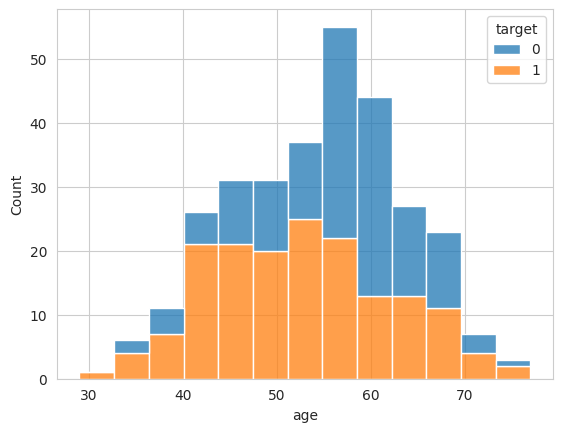

In [41]:
sns.histplot(data=df, x='age', hue='target', multiple='stack')

Penderita heart disesase menyebar ke berbagai usia. Begitu juga dengan orang yang dalam keadaan sehat. Namun jumlhanya lebih banyak untuk orang yang dalam kondisi sehat. Dan ternyata kebanyakan penderita hear disease sering terjadi di usia 40 hingga 60 tahun

Gambaran presentase chol dengan target

<Axes: xlabel='chol', ylabel='Count'>

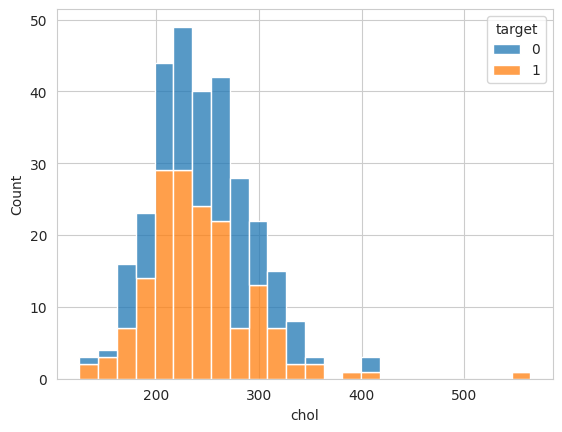

In [42]:
sns.histplot(data=df, x='chol', hue='target', multiple='stack')

Presentase trestbps dengan target

<Axes: xlabel='trestbps', ylabel='Count'>

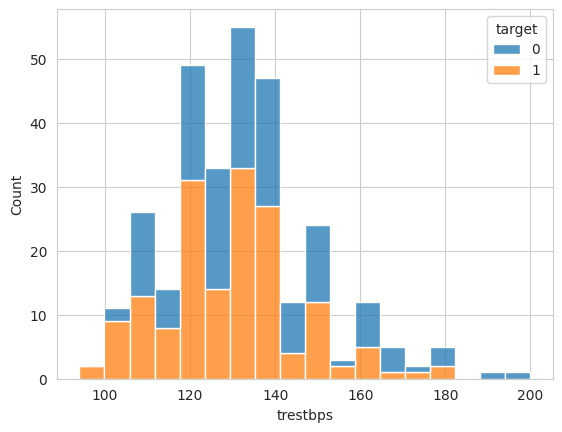

In [43]:
sns.histplot(data=df, x='trestbps', hue='target', multiple='stack')

Presentase thalach dengan target

<Axes: xlabel='thalach', ylabel='Count'>

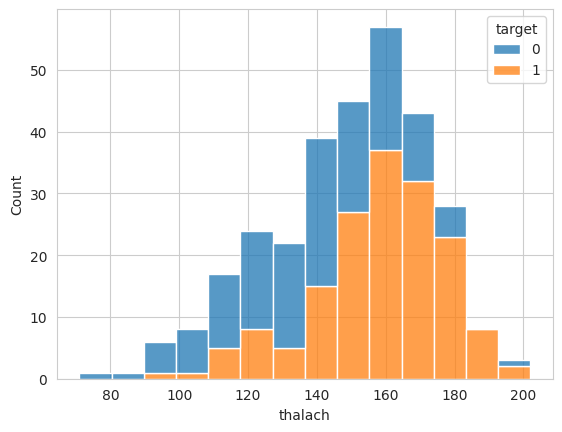

In [44]:
sns.histplot(data=df, x='thalach', hue='target', multiple='stack')

Penderita heart disease cukup banyak terjadi dengan kondisi thalach dari 120 hingga 190

Presentase thalach dengan target

<Axes: xlabel='oldpeak', ylabel='Count'>

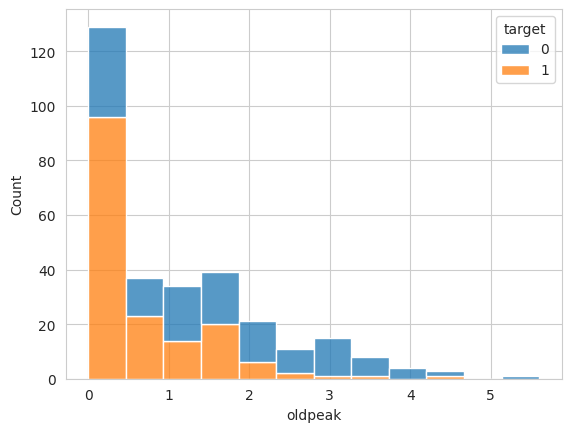

In [45]:
sns.histplot(data=df, x='oldpeak', hue='target', multiple='stack')

Ternyata semakin banyak/tinggi oldpeaknya, semakin berpeluang kondisi seseorang sehat.

Pola hubungan antara tekanan darah dan usia dalam dataset

<ipython-input-46-8ee9dea2a17e>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="trestbps", y="age",


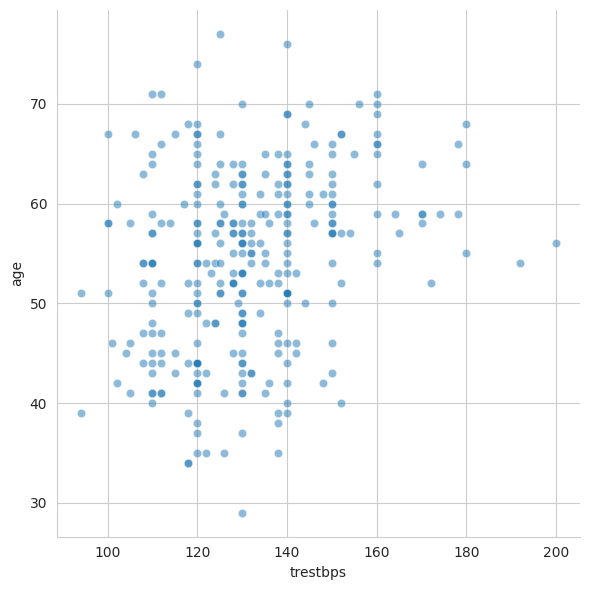

In [46]:
sns.relplot(x="trestbps", y="age",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

Orang yang usianya meningkat, cenderung tretsbpsnya juga tinggi

##Analisis Jenis nyeri dada (CP)

In [47]:
df['cp'].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

<Axes: xlabel='cp', ylabel='Count'>

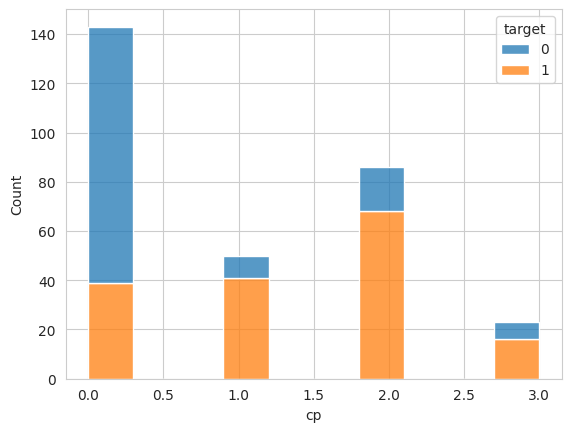

In [48]:
sns.histplot(data=df, x='cp', hue='target', multiple='stack')

cp orang penderita heart disease beragam, dan kebnayakan adalah dari 0, 1 hingga 2.

##Analisis Thalach

In [49]:
df['thalach'].value_counts()

162    11
163     9
160     9
152     8
144     7
       ..
167     1
134     1
177     1
95      1
113     1
Name: thalach, Length: 91, dtype: int64

In [50]:
# Ganti nilai 'thalach' yang lebih dari 200 dengan median
median_thalach = df['thalach'].median()
df.loc[df['thalach'] > 200, 'thalach'] = median_thalach

In [51]:
df['thalach'].max()

195.0

Thal analysis

In [52]:
df['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

Melihat keseimbangan data

In [53]:
# Melihat jumlah penderita penyakit jantung dan tidak
sick_counts = df['target'].value_counts()
print('Jumlah Orang Keadaan Sehat:', sick_counts[0])
print('Jumlah Penderita Heart Disaese:', sick_counts[1])

Jumlah Orang Keadaan Sehat: 138
Jumlah Penderita Heart Disaese: 164


Apabila ketidakseimbangan data tidak ditangani, akan membuat model tidak berperforma optimal

##Dilakukan penyeimbangan data menggunakan SMOTE

####Cara kerja SMOTE untuk menyeimbangkan data
1. SMOTE memilih satu sampel dari kelas minoritas yang akan di-'over-sample'.

2. Kemudian, SMOTE memilih beberapa tetangga terdekat dari sampel tersebut.

3. Untuk setiap tetangga yang dipilih, SMOTE menghitung perbedaan antara fitur-fitur sampel awal dan tetangga tersebut.

4. SMOTE kemudian menghasilkan sampel sintetis dengan cara mengambil rasio perbedaan ini dan menggabungkannya dengan sampel awal. Ini menghasilkan sampel baru yang seimbang antara sampel awal dan tetangga.

5. Proses ini diulang untuk beberapa sampel dari kelas minoritas hingga jumlahnya seimbang dengan kelas mayoritas.

In [54]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Menerapkan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menggabungkan fitur dan target kembali
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame({'target': y_resampled})], axis=1)

In [55]:
# Melihat distribusi kelas setelah SMOTE
class_counts = df_resampled['target'].value_counts()
print('Jumlah Penderita Heart Disease:', class_counts[1])
print('Jumlah Orang Sehat:', class_counts[0])

Jumlah Penderita Heart Disease: 164
Jumlah Orang Sehat: 164


In [56]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.405629,0.327815,1.025166,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.703313,0.470196,1.122717,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.250000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


#Feature Engineering

1. Kelompok Usia

In [57]:
#Membuat Kelompok Usia

df['age_group'] = np.where(df['age'] < 30, 'Muda', np.where(df['age'] <= 60, 'Tua', 'Lansia'))


In [58]:
df_muda = df[df['age_group'] == 'Muda']
df_muda

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
60,29,1,1,130,204,0,0,152.5,0,0.0,2,0,2,1,Muda


In [59]:
df_tua = df[df['age_group'] == 'Tua']
df_tua

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212,0,1,168.0,0,1.0,2,2,3,0,Tua
1,53,1,0,140,203,1,0,155.0,1,3.1,0,0,3,0,Tua
5,58,0,0,100,248,0,0,122.0,0,1.0,1,0,2,1,Tua
6,58,1,0,114,318,0,2,140.0,0,4.4,0,3,1,0,Tua
7,55,1,0,160,289,0,0,145.0,1,0.8,1,1,3,0,Tua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,52,1,0,108,233,1,1,147.0,0,0.1,2,3,3,1,Tua
733,44,0,2,108,141,0,1,175.0,0,0.6,1,0,2,1,Tua
739,52,1,0,128,255,0,1,161.0,1,0.0,2,1,3,0,Tua
843,59,1,3,160,273,0,0,125.0,0,0.0,2,0,2,0,Tua


In [60]:
df_lansia = df[df['age_group'] == 'Lansia']
df_lansia

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
2,70,1,0,145,174,0,1,125.0,1,2.6,0,0,3,0,Lansia
3,61,1,0,148,203,0,1,161.0,0,0.0,2,1,3,0,Lansia
4,62,0,0,138,294,1,1,106.0,0,1.9,1,3,2,0,Lansia
10,71,0,0,112,149,0,1,125.0,0,1.6,1,0,2,1,Lansia
21,67,0,0,106,223,0,1,142.0,0,0.3,2,2,2,1,Lansia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,61,1,0,138,166,0,0,125.0,1,3.6,1,1,2,0,Lansia
643,65,1,0,120,177,0,1,140.0,0,0.4,2,0,3,1,Lansia
652,66,0,3,150,226,0,1,114.0,0,2.6,0,0,2,1,Lansia
720,64,1,2,140,335,0,1,158.0,0,0.0,2,0,2,0,Lansia


Uji Korelasi

In [61]:
correlation = df['age_group'].astype('category').cat.codes.corr(df['target'])
correlation

0.1160499123656859

Fitur baru ini berhubungan positif dengan target dengan tingkat kekuatan 0.116 dari 1

<Axes: xlabel='age_group', ylabel='count'>

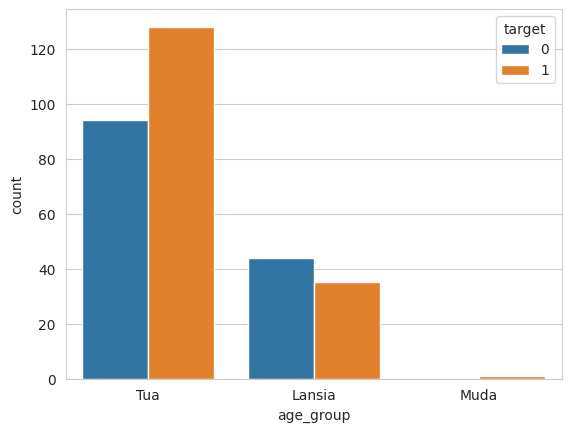

In [62]:
sns.countplot(data=df, x="age_group", hue="target")

2. Rasio Tekanan Darah (trestbps) terhadap Detak Jantung Maksimal (thalach):

In [63]:
df['ratio_BP'] = df['trestbps'] / df['thalach']

In [64]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,ratio_BP
0,52,1,0,125,212,0,1,168.0,0,1.0,2,2,3,0,Tua,0.744048
1,53,1,0,140,203,1,0,155.0,1,3.1,0,0,3,0,Tua,0.903226
2,70,1,0,145,174,0,1,125.0,1,2.6,0,0,3,0,Lansia,1.160000
3,61,1,0,148,203,0,1,161.0,0,0.0,2,1,3,0,Lansia,0.919255
4,62,0,0,138,294,1,1,106.0,0,1.9,1,3,2,0,Lansia,1.301887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115.0,0,1.5,1,0,2,1,Lansia,1.043478
733,44,0,2,108,141,0,1,175.0,0,0.6,1,0,2,1,Tua,0.617143
739,52,1,0,128,255,0,1,161.0,1,0.0,2,1,3,0,Tua,0.795031
843,59,1,3,160,273,0,0,125.0,0,0.0,2,0,2,0,Tua,1.280000


In [65]:
correlation = df['ratio_BP'].astype('category').cat.codes.corr(df['target'])
correlation

-0.4014382199117873

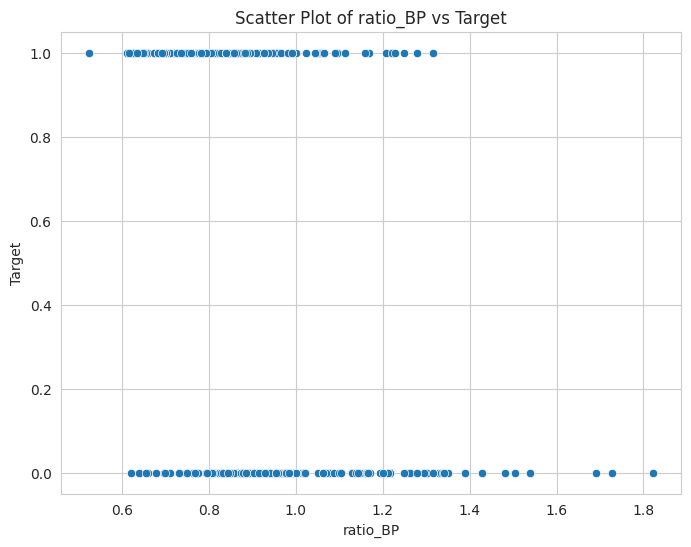

Koefisien Korelasi (Pearson): -0.3946114626161195


In [66]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="ratio_BP", y="target")
plt.title("Scatter Plot of ratio_BP vs Target")
plt.xlabel("ratio_BP")
plt.ylabel("Target")
plt.show()

# Korelasi Pearson
correlation = df["ratio_BP"].corr(df["target"])
print(f"Koefisien Korelasi (Pearson): {correlation}")

ratio_BP menunjukkan korelasi negatif dengan target. Semakin besar ratio_BP, maka sesorang lebih berpeluang menjadi orang yang sehat

3. Rata-rata Tekanan Darah (trestbps) berdasarkan Jenis Kelamin (sex)

In [67]:
avg_bp_by_sex = df.groupby('sex')['trestbps'].mean().to_dict()
df['avg_BP_by_sex'] = df['sex'].map(avg_bp_by_sex)

In [68]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,ratio_BP,avg_BP_by_sex
0,52,1,0,125,212,0,1,168.0,0,1.0,2,2,3,0,Tua,0.744048,130.912621
1,53,1,0,140,203,1,0,155.0,1,3.1,0,0,3,0,Tua,0.903226,130.912621
2,70,1,0,145,174,0,1,125.0,1,2.6,0,0,3,0,Lansia,1.160000,130.912621
3,61,1,0,148,203,0,1,161.0,0,0.0,2,1,3,0,Lansia,0.919255,130.912621
4,62,0,0,138,294,1,1,106.0,0,1.9,1,3,2,0,Lansia,1.301887,133.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115.0,0,1.5,1,0,2,1,Lansia,1.043478,133.083333
733,44,0,2,108,141,0,1,175.0,0,0.6,1,0,2,1,Tua,0.617143,133.083333
739,52,1,0,128,255,0,1,161.0,1,0.0,2,1,3,0,Tua,0.795031,130.912621
843,59,1,3,160,273,0,0,125.0,0,0.0,2,0,2,0,Tua,1.280000,130.912621


In [69]:
correlation = df['avg_BP_by_sex'].astype('category').cat.codes.corr(df['target'])
correlation

0.28360935779586227

<Axes: xlabel='avg_BP_by_sex', ylabel='count'>

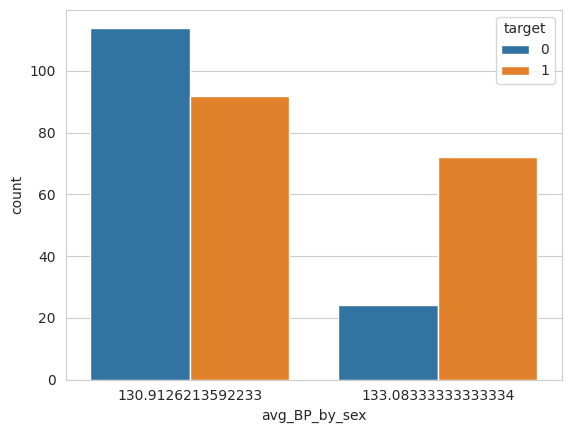

In [70]:
sns.countplot(data=df, x="avg_BP_by_sex", hue="target")

4. Fitness Level

In [71]:
df['fitness_level'] = df['thalach'] / (220 - df['age'])

In [72]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,ratio_BP,avg_BP_by_sex,fitness_level
0,52,1,0,125,212,0,1,168.0,0,1.0,2,2,3,0,Tua,0.744048,130.912621,1.000000
1,53,1,0,140,203,1,0,155.0,1,3.1,0,0,3,0,Tua,0.903226,130.912621,0.928144
2,70,1,0,145,174,0,1,125.0,1,2.6,0,0,3,0,Lansia,1.160000,130.912621,0.833333
3,61,1,0,148,203,0,1,161.0,0,0.0,2,1,3,0,Lansia,0.919255,130.912621,1.012579
4,62,0,0,138,294,1,1,106.0,0,1.9,1,3,2,0,Lansia,1.301887,133.083333,0.670886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115.0,0,1.5,1,0,2,1,Lansia,1.043478,133.083333,0.756579
733,44,0,2,108,141,0,1,175.0,0,0.6,1,0,2,1,Tua,0.617143,133.083333,0.994318
739,52,1,0,128,255,0,1,161.0,1,0.0,2,1,3,0,Tua,0.795031,130.912621,0.958333
843,59,1,3,160,273,0,0,125.0,0,0.0,2,0,2,0,Tua,1.280000,130.912621,0.776398


In [73]:
correlation = df['fitness_level'].astype('category').cat.codes.corr(df['target'])
correlation

0.3515783194963224

Korelasinya dengan target, cukup kuat dan berkolerasi positif

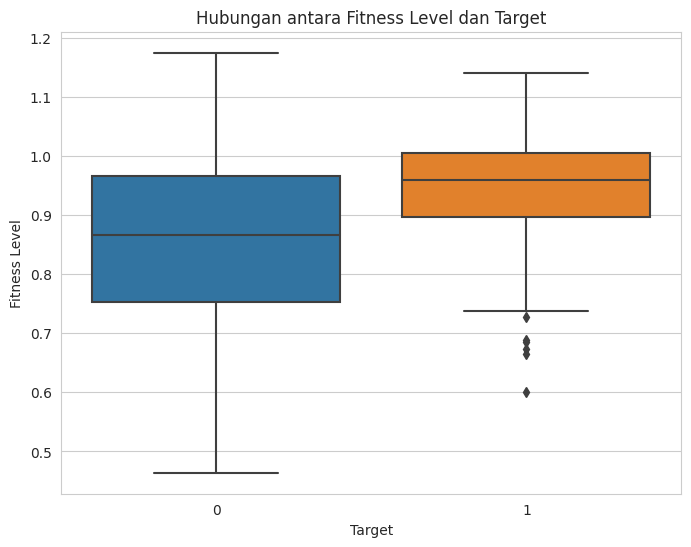

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='fitness_level')
plt.xlabel('Target')
plt.ylabel('Fitness Level')
plt.title('Hubungan antara Fitness Level dan Target')
plt.show()

<ipython-input-75-8c3c38088ede>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='target', y='fitness_level', ci=None)


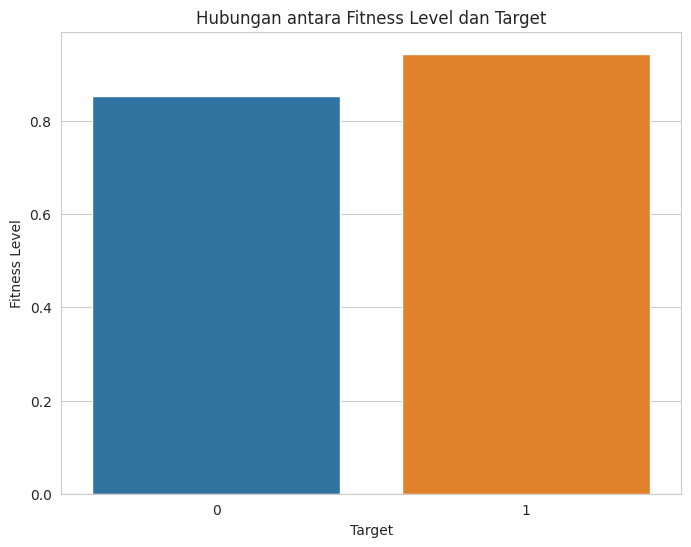

In [75]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='target', y='fitness_level', ci=None)
plt.xlabel('Target')
plt.ylabel('Fitness Level')
plt.title('Hubungan antara Fitness Level dan Target')
plt.show()

5. Rata-rata Kolesterol (chol) berdasarkan Jenis Kelamin (sex)

In [76]:
avg_chol_by_sex = df.groupby('sex')['chol'].mean().to_dict()
df['avg_chol_by_sex'] = df['sex'].map(avg_chol_by_sex)


In [77]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,ratio_BP,avg_BP_by_sex,fitness_level,avg_chol_by_sex
0,52,1,0,125,212,0,1,168.0,0,1.0,2,2,3,0,Tua,0.744048,130.912621,1.000000,239.601942
1,53,1,0,140,203,1,0,155.0,1,3.1,0,0,3,0,Tua,0.903226,130.912621,0.928144,239.601942
2,70,1,0,145,174,0,1,125.0,1,2.6,0,0,3,0,Lansia,1.160000,130.912621,0.833333,239.601942
3,61,1,0,148,203,0,1,161.0,0,0.0,2,1,3,0,Lansia,0.919255,130.912621,1.012579,239.601942
4,62,0,0,138,294,1,1,106.0,0,1.9,1,3,2,0,Lansia,1.301887,133.083333,0.670886,261.302083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115.0,0,1.5,1,0,2,1,Lansia,1.043478,133.083333,0.756579,261.302083
733,44,0,2,108,141,0,1,175.0,0,0.6,1,0,2,1,Tua,0.617143,133.083333,0.994318,261.302083
739,52,1,0,128,255,0,1,161.0,1,0.0,2,1,3,0,Tua,0.795031,130.912621,0.958333,239.601942
843,59,1,3,160,273,0,0,125.0,0,0.0,2,0,2,0,Tua,1.280000,130.912621,0.776398,239.601942


In [78]:
correlation = df['avg_chol_by_sex'].astype('category').cat.codes.corr(df['target'])
correlation

0.28360935779586227

<Axes: xlabel='avg_chol_by_sex', ylabel='count'>

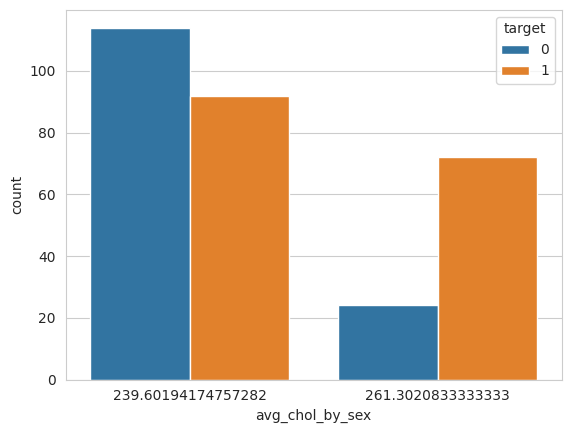

In [79]:
sns.countplot(data=df, x="avg_chol_by_sex", hue="target")

6. Kategori Tekanan Darah

In [80]:
df['trestbps_category'] = pd.cut(
    df['trestbps'],
    bins=[0, 120, 129, 139, 180, float('inf')],  # Definisikan batas kategori sesuai kebutuhan
    labels=['Normal', 'Elevated', 'High BP Stage 1', 'High BP Stage 2', 'Hypertensive Crisis']
)

In [81]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,ratio_BP,avg_BP_by_sex,fitness_level,avg_chol_by_sex,trestbps_category
0,52,1,0,125,212,0,1,168.0,0,1.0,2,2,3,0,Tua,0.744048,130.912621,1.000000,239.601942,Elevated
1,53,1,0,140,203,1,0,155.0,1,3.1,0,0,3,0,Tua,0.903226,130.912621,0.928144,239.601942,High BP Stage 2
2,70,1,0,145,174,0,1,125.0,1,2.6,0,0,3,0,Lansia,1.160000,130.912621,0.833333,239.601942,High BP Stage 2
3,61,1,0,148,203,0,1,161.0,0,0.0,2,1,3,0,Lansia,0.919255,130.912621,1.012579,239.601942,High BP Stage 2
4,62,0,0,138,294,1,1,106.0,0,1.9,1,3,2,0,Lansia,1.301887,133.083333,0.670886,261.302083,High BP Stage 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115.0,0,1.5,1,0,2,1,Lansia,1.043478,133.083333,0.756579,261.302083,Normal
733,44,0,2,108,141,0,1,175.0,0,0.6,1,0,2,1,Tua,0.617143,133.083333,0.994318,261.302083,Normal
739,52,1,0,128,255,0,1,161.0,1,0.0,2,1,3,0,Tua,0.795031,130.912621,0.958333,239.601942,Elevated
843,59,1,3,160,273,0,0,125.0,0,0.0,2,0,2,0,Tua,1.280000,130.912621,0.776398,239.601942,High BP Stage 2


In [82]:
df_normal = df[df['trestbps_category'] == 'Normal']
df_normal

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,ratio_BP,avg_BP_by_sex,fitness_level,avg_chol_by_sex,trestbps_category
5,58,0,0,100,248,0,0,122.0,0,1.0,1,0,2,1,Tua,0.819672,133.083333,0.753086,261.302083,Normal
6,58,1,0,114,318,0,2,140.0,0,4.4,0,3,1,0,Tua,0.814286,130.912621,0.864198,239.601942,Normal
8,46,1,0,120,249,0,0,144.0,0,0.8,2,0,3,0,Tua,0.833333,130.912621,0.827586,239.601942,Normal
10,71,0,0,112,149,0,1,125.0,0,1.6,1,0,2,1,Lansia,0.896000,133.083333,0.838926,261.302083,Normal
12,34,0,1,118,210,0,1,192.0,0,0.7,2,0,2,1,Tua,0.614583,133.083333,1.032258,261.302083,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,60,0,2,120,178,1,1,96.0,0,0.0,2,0,2,1,Tua,1.250000,133.083333,0.600000,261.302083,Normal
719,52,1,0,108,233,1,1,147.0,0,0.1,2,3,3,1,Tua,0.734694,130.912621,0.875000,239.601942,Normal
723,68,0,2,120,211,0,0,115.0,0,1.5,1,0,2,1,Lansia,1.043478,133.083333,0.756579,261.302083,Normal
733,44,0,2,108,141,0,1,175.0,0,0.6,1,0,2,1,Tua,0.617143,133.083333,0.994318,261.302083,Normal


In [83]:
df_minNormal = df_normal['trestbps'].min()
df_maxNormal= df_normal['trestbps'].max()
print('Kelompok Normal trestbps terendah', df_minNormal)
print('Kelompok Normal trestbps tertinggi', df_maxNormal)

Kelompok Normal trestbps terendah 94
Kelompok Normal trestbps tertinggi 120


In [84]:
df_normal['trestbps'].value_counts()

120    37
110    19
112     9
118     7
108     6
100     4
115     3
105     3
94      2
102     2
114     1
106     1
104     1
117     1
101     1
Name: trestbps, dtype: int64

In [85]:
correlation = df['trestbps_category'].astype('category').cat.codes.corr(df['target'])
correlation

-0.11064540565467902

<Axes: xlabel='trestbps_category', ylabel='count'>

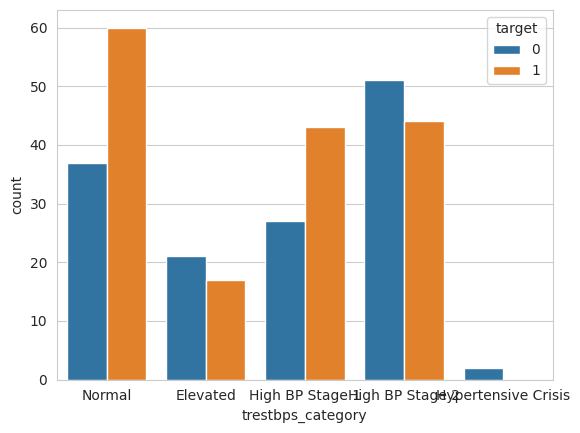

In [86]:
sns.countplot(data=df, x="trestbps_category", hue="target")

Penderita Heart disease cenderung kategori trestbpsnya adalah normal, High BP Stage 1 dan High BP Stage 2


7. Skor Risiko Kardiovaskular

In [87]:
df['cvd_risk_score'] = (df['age'] * 0.2) + (df['chol'] * 0.1) - (df['thalach'] * 0.15)

In [88]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,age_group,ratio_BP,avg_BP_by_sex,fitness_level,avg_chol_by_sex,trestbps_category,cvd_risk_score
0,52,1,0,125,212,0,1,168.0,0,1.0,...,2,3,0,Tua,0.744048,130.912621,1.000000,239.601942,Elevated,6.40
1,53,1,0,140,203,1,0,155.0,1,3.1,...,0,3,0,Tua,0.903226,130.912621,0.928144,239.601942,High BP Stage 2,7.65
2,70,1,0,145,174,0,1,125.0,1,2.6,...,0,3,0,Lansia,1.160000,130.912621,0.833333,239.601942,High BP Stage 2,12.65
3,61,1,0,148,203,0,1,161.0,0,0.0,...,1,3,0,Lansia,0.919255,130.912621,1.012579,239.601942,High BP Stage 2,8.35
4,62,0,0,138,294,1,1,106.0,0,1.9,...,3,2,0,Lansia,1.301887,133.083333,0.670886,261.302083,High BP Stage 1,25.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115.0,0,1.5,...,0,2,1,Lansia,1.043478,133.083333,0.756579,261.302083,Normal,17.45
733,44,0,2,108,141,0,1,175.0,0,0.6,...,0,2,1,Tua,0.617143,133.083333,0.994318,261.302083,Normal,-3.35
739,52,1,0,128,255,0,1,161.0,1,0.0,...,1,3,0,Tua,0.795031,130.912621,0.958333,239.601942,Elevated,11.75
843,59,1,3,160,273,0,0,125.0,0,0.0,...,0,2,0,Tua,1.280000,130.912621,0.776398,239.601942,High BP Stage 2,20.35


In [89]:
correlation = df['cvd_risk_score'].astype('category').cat.codes.corr(df['target'])
correlation

-0.33267788340454085

<ipython-input-90-f3ec5e56e303>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='target', y='cvd_risk_score', ci=None)


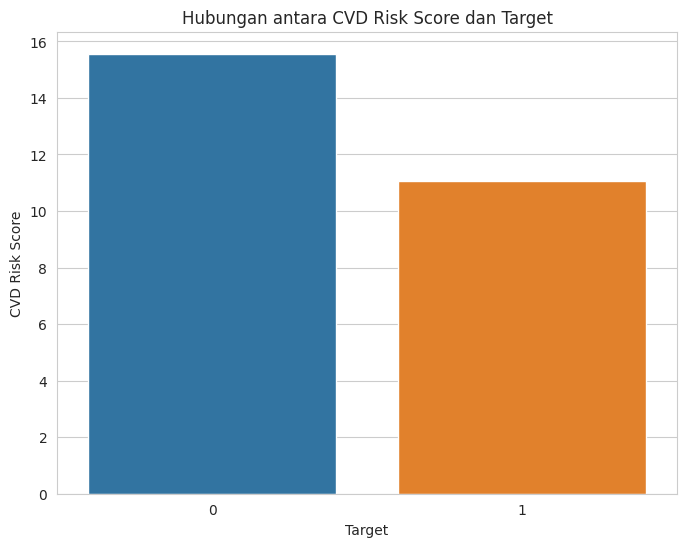

In [90]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='target', y='cvd_risk_score', ci=None)
plt.xlabel('Target')
plt.ylabel('CVD Risk Score')
plt.title('Hubungan antara CVD Risk Score dan Target')
plt.show()


8. Rasio Tekanan Darah (trestbps) terhadap Kolesterol (chol)

In [91]:
df['ratio_BP_Chol'] = df['trestbps'] / df['chol']

In [92]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,age_group,ratio_BP,avg_BP_by_sex,fitness_level,avg_chol_by_sex,trestbps_category,cvd_risk_score,ratio_BP_Chol
0,52,1,0,125,212,0,1,168.0,0,1.0,...,3,0,Tua,0.744048,130.912621,1.000000,239.601942,Elevated,6.40,0.589623
1,53,1,0,140,203,1,0,155.0,1,3.1,...,3,0,Tua,0.903226,130.912621,0.928144,239.601942,High BP Stage 2,7.65,0.689655
2,70,1,0,145,174,0,1,125.0,1,2.6,...,3,0,Lansia,1.160000,130.912621,0.833333,239.601942,High BP Stage 2,12.65,0.833333
3,61,1,0,148,203,0,1,161.0,0,0.0,...,3,0,Lansia,0.919255,130.912621,1.012579,239.601942,High BP Stage 2,8.35,0.729064
4,62,0,0,138,294,1,1,106.0,0,1.9,...,2,0,Lansia,1.301887,133.083333,0.670886,261.302083,High BP Stage 1,25.90,0.469388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115.0,0,1.5,...,2,1,Lansia,1.043478,133.083333,0.756579,261.302083,Normal,17.45,0.568720
733,44,0,2,108,141,0,1,175.0,0,0.6,...,2,1,Tua,0.617143,133.083333,0.994318,261.302083,Normal,-3.35,0.765957
739,52,1,0,128,255,0,1,161.0,1,0.0,...,3,0,Tua,0.795031,130.912621,0.958333,239.601942,Elevated,11.75,0.501961
843,59,1,3,160,273,0,0,125.0,0,0.0,...,2,0,Tua,1.280000,130.912621,0.776398,239.601942,High BP Stage 2,20.35,0.586081


In [93]:
correlation = df['ratio_BP_Chol'].astype('category').cat.codes.corr(df['target'])
correlation

0.01322900264032367

<ipython-input-94-70fc07a2a258>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='target', y='ratio_BP_Chol', ci=None)


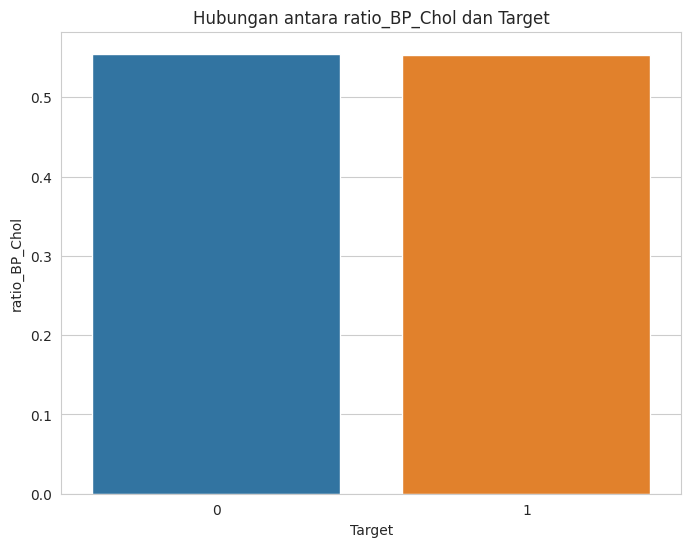

In [94]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='target', y='ratio_BP_Chol', ci=None)
plt.xlabel('Target')
plt.ylabel('ratio_BP_Chol')
plt.title('Hubungan antara ratio_BP_Chol dan Target')
plt.show()


9. Indeks Glikemik (Glycemic Index)

In [95]:
df['glycemic_index'] = df['chol'] + (df['fbs'] * 100)


In [96]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,age_group,ratio_BP,avg_BP_by_sex,fitness_level,avg_chol_by_sex,trestbps_category,cvd_risk_score,ratio_BP_Chol,glycemic_index
0,52,1,0,125,212,0,1,168.0,0,1.0,...,0,Tua,0.744048,130.912621,1.000000,239.601942,Elevated,6.40,0.589623,212
1,53,1,0,140,203,1,0,155.0,1,3.1,...,0,Tua,0.903226,130.912621,0.928144,239.601942,High BP Stage 2,7.65,0.689655,303
2,70,1,0,145,174,0,1,125.0,1,2.6,...,0,Lansia,1.160000,130.912621,0.833333,239.601942,High BP Stage 2,12.65,0.833333,174
3,61,1,0,148,203,0,1,161.0,0,0.0,...,0,Lansia,0.919255,130.912621,1.012579,239.601942,High BP Stage 2,8.35,0.729064,203
4,62,0,0,138,294,1,1,106.0,0,1.9,...,0,Lansia,1.301887,133.083333,0.670886,261.302083,High BP Stage 1,25.90,0.469388,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115.0,0,1.5,...,1,Lansia,1.043478,133.083333,0.756579,261.302083,Normal,17.45,0.568720,211
733,44,0,2,108,141,0,1,175.0,0,0.6,...,1,Tua,0.617143,133.083333,0.994318,261.302083,Normal,-3.35,0.765957,141
739,52,1,0,128,255,0,1,161.0,1,0.0,...,0,Tua,0.795031,130.912621,0.958333,239.601942,Elevated,11.75,0.501961,255
843,59,1,3,160,273,0,0,125.0,0,0.0,...,0,Tua,1.280000,130.912621,0.776398,239.601942,High BP Stage 2,20.35,0.586081,273


In [97]:
correlation = df['glycemic_index'].astype('category').cat.codes.corr(df['target'])
correlation

-0.1007912312396445

<ipython-input-98-2bfd663bb96f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='target', y='glycemic_index', ci=None)


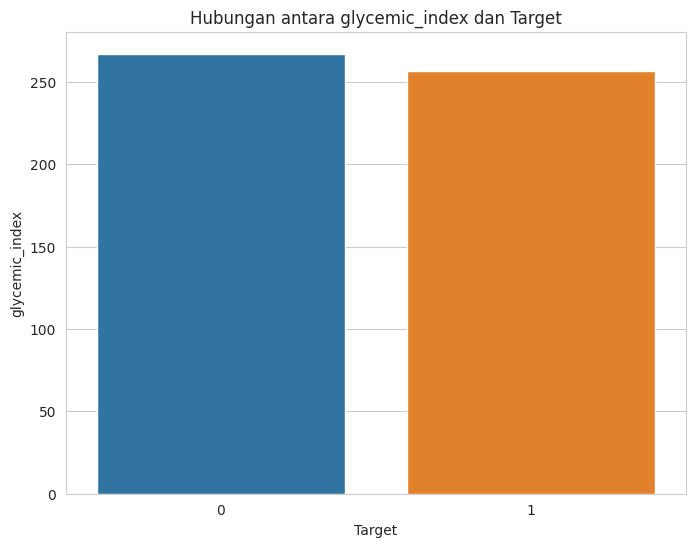

In [98]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='target', y='glycemic_index', ci=None)
plt.xlabel('Target')
plt.ylabel('glycemic_index')
plt.title('Hubungan antara glycemic_index dan Target')
plt.show()


10. Tingkat Kemiringan (Slope) dari Serangan Jantung

In [99]:
df['slope_risk'] = df['slope'] * (df['ca'] + 1)

In [100]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,age_group,ratio_BP,avg_BP_by_sex,fitness_level,avg_chol_by_sex,trestbps_category,cvd_risk_score,ratio_BP_Chol,glycemic_index,slope_risk
0,52,1,0,125,212,0,1,168.0,0,1.0,...,Tua,0.744048,130.912621,1.000000,239.601942,Elevated,6.40,0.589623,212,6
1,53,1,0,140,203,1,0,155.0,1,3.1,...,Tua,0.903226,130.912621,0.928144,239.601942,High BP Stage 2,7.65,0.689655,303,0
2,70,1,0,145,174,0,1,125.0,1,2.6,...,Lansia,1.160000,130.912621,0.833333,239.601942,High BP Stage 2,12.65,0.833333,174,0
3,61,1,0,148,203,0,1,161.0,0,0.0,...,Lansia,0.919255,130.912621,1.012579,239.601942,High BP Stage 2,8.35,0.729064,203,4
4,62,0,0,138,294,1,1,106.0,0,1.9,...,Lansia,1.301887,133.083333,0.670886,261.302083,High BP Stage 1,25.90,0.469388,394,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115.0,0,1.5,...,Lansia,1.043478,133.083333,0.756579,261.302083,Normal,17.45,0.568720,211,1
733,44,0,2,108,141,0,1,175.0,0,0.6,...,Tua,0.617143,133.083333,0.994318,261.302083,Normal,-3.35,0.765957,141,1
739,52,1,0,128,255,0,1,161.0,1,0.0,...,Tua,0.795031,130.912621,0.958333,239.601942,Elevated,11.75,0.501961,255,4
843,59,1,3,160,273,0,0,125.0,0,0.0,...,Tua,1.280000,130.912621,0.776398,239.601942,High BP Stage 2,20.35,0.586081,273,2


In [101]:
correlation = df['slope_risk'].astype('category').cat.codes.corr(df['target'])
correlation

-0.11536898533453091

<ipython-input-102-94e068d05a01>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='target', y='slope_risk', ci=None)


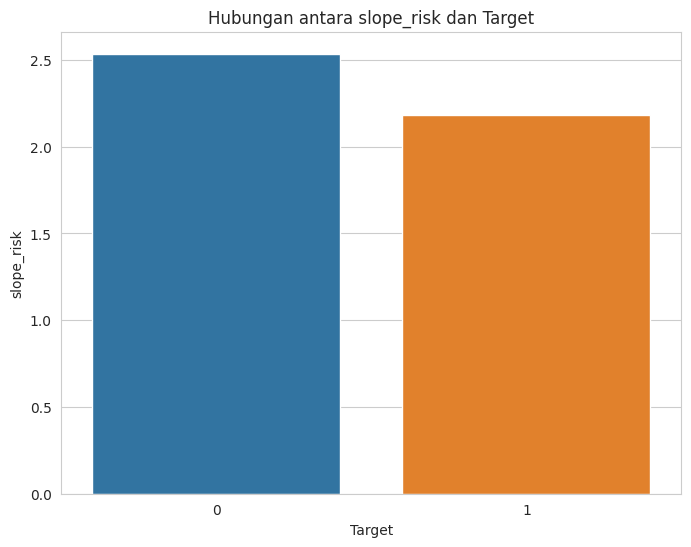

In [102]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='target', y='slope_risk', ci=None)
plt.xlabel('Target')
plt.ylabel('slope_risk')
plt.title('Hubungan antara slope_risk dan Target')
plt.show()


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                302 non-null    int64   
 1   sex                302 non-null    int64   
 2   cp                 302 non-null    int64   
 3   trestbps           302 non-null    int64   
 4   chol               302 non-null    int64   
 5   fbs                302 non-null    int64   
 6   restecg            302 non-null    int64   
 7   thalach            302 non-null    float64 
 8   exang              302 non-null    int64   
 9   oldpeak            302 non-null    float64 
 10  slope              302 non-null    int64   
 11  ca                 302 non-null    int64   
 12  thal               302 non-null    int64   
 13  target             302 non-null    int64   
 14  age_group          302 non-null    object  
 15  ratio_BP           302 non-null    float64 
 16  avg_BP_b

In [104]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,ratio_BP,avg_BP_by_sex,fitness_level,avg_chol_by_sex,cvd_risk_score,ratio_BP_Chol,glycemic_index,slope_risk
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.405629,0.327815,1.025166,...,2.314570,0.543046,0.905679,131.602649,0.902189,246.500000,13.123262,0.554407,261.400662,2.344371
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.703313,0.470196,1.122717,...,0.613026,0.498970,0.208080,1.012476,0.127973,10.121505,7.083791,0.127403,63.189125,1.698334
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,...,0.000000,0.000000,0.525140,130.912621,0.464052,239.601942,-3.400000,0.203901,131.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,...,2.000000,0.000000,0.758555,130.912621,0.829650,239.601942,8.225000,0.462034,216.250000,1.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.250000,0.000000,0.800000,...,2.000000,1.000000,0.865432,130.912621,0.928124,239.601942,12.550000,0.537889,251.000000,2.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,165.750000,1.000000,1.600000,...,3.000000,1.000000,0.992955,133.083333,1.000000,261.302083,17.487500,0.634177,301.500000,3.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,...,3.000000,1.000000,1.822222,133.083333,1.174699,261.302083,45.800000,1.190476,564.000000,10.000000


df.describe()

Korelasi Antar Fitur

<ipython-input-105-87ccc645dd0c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


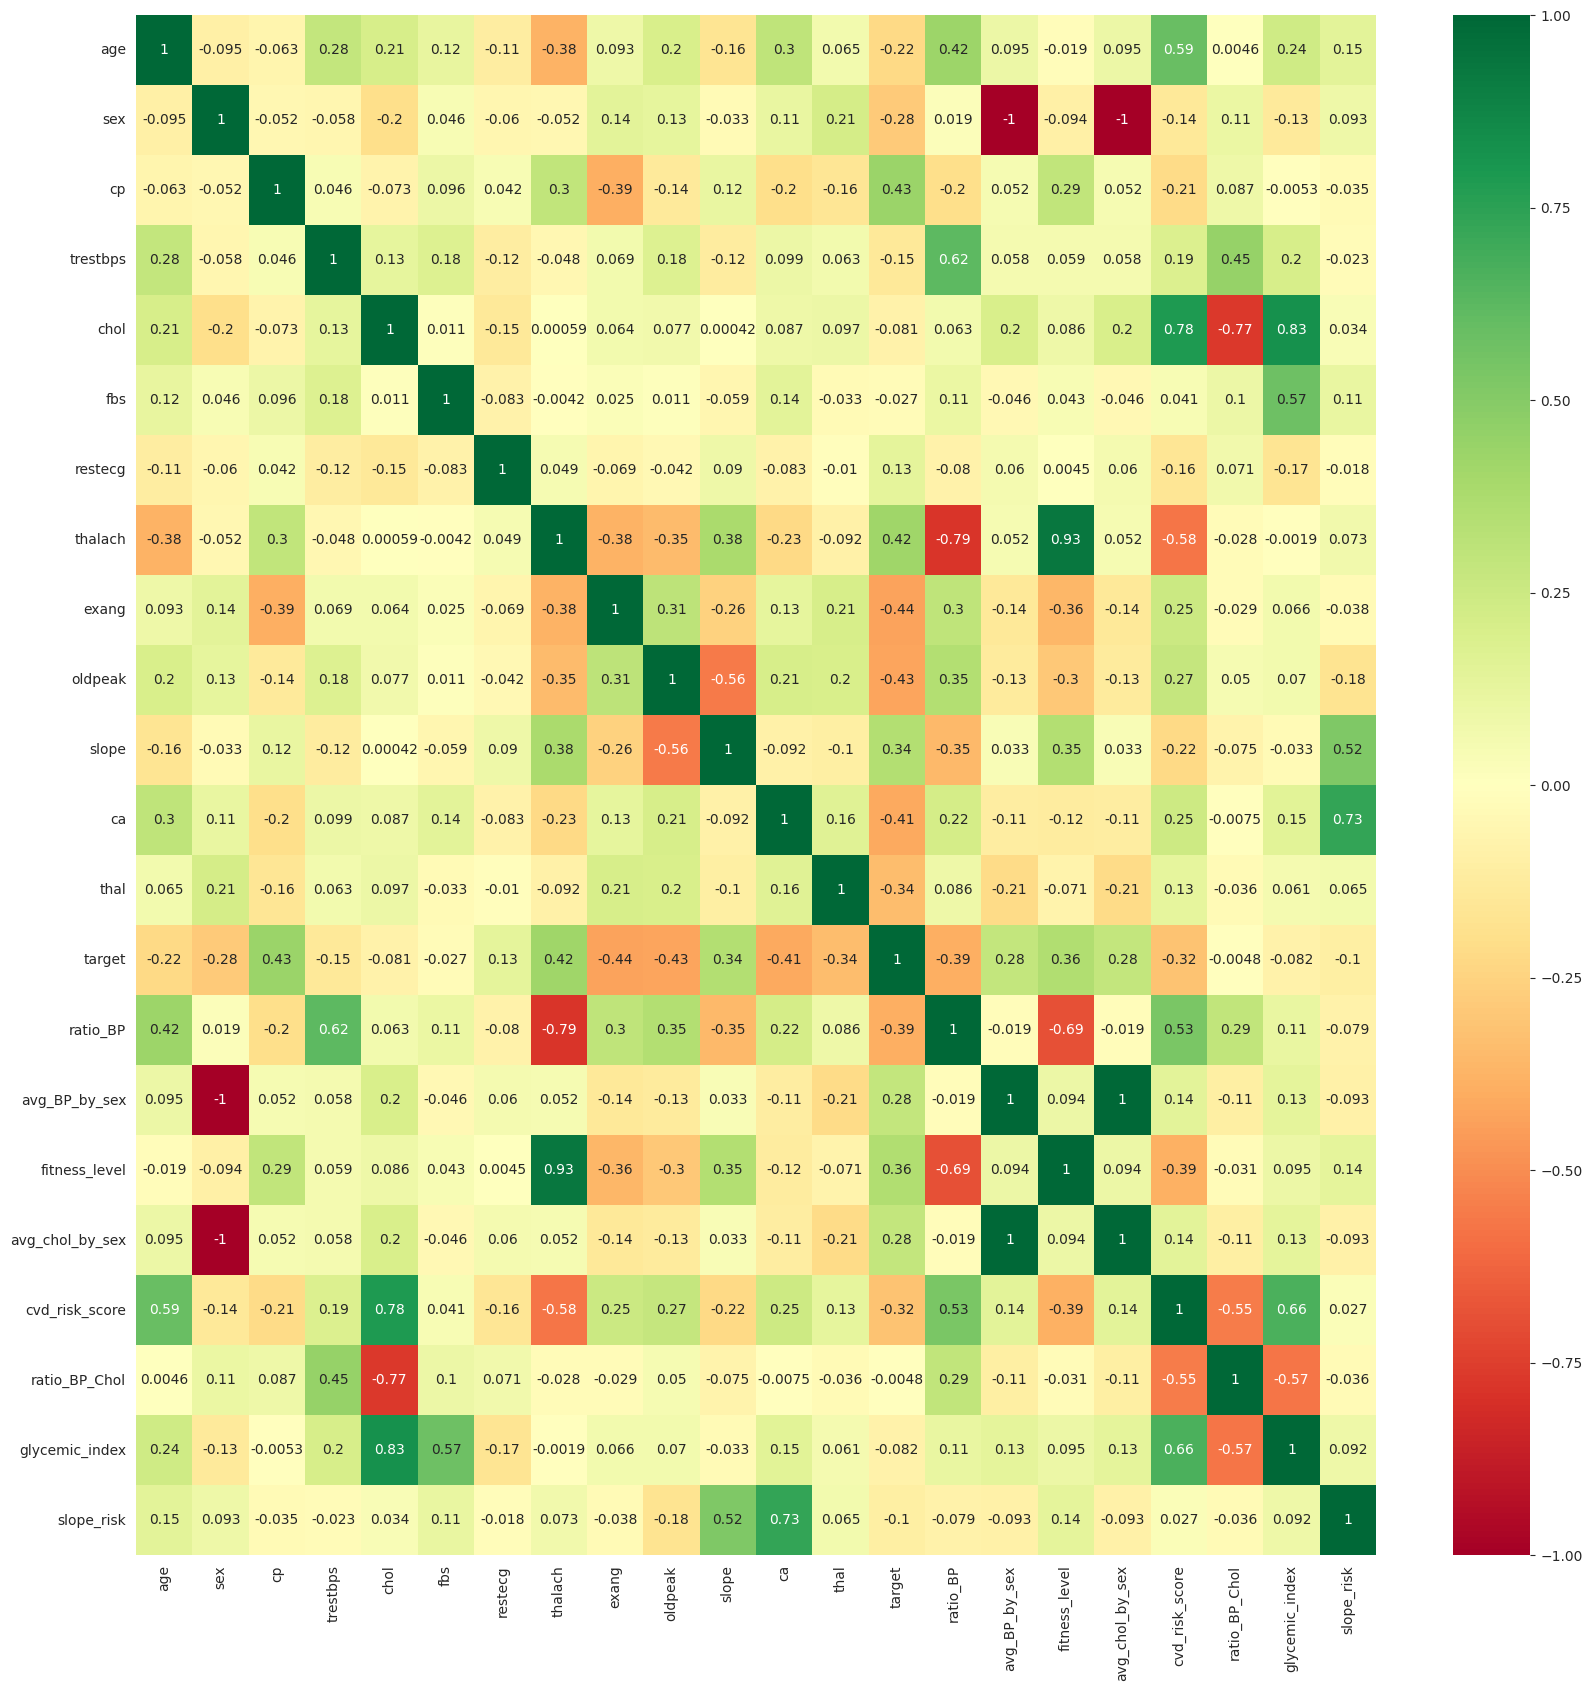

In [105]:
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
g = sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="RdYlGn")

Berdasarkan hetamap yang ditampilkan, beberapa fitur yang paling berpengaruh terhadap target adalah:
Berkorelasi positif: cp, thalach, fitness_leveldan slope
Berkolerasi negatif :exang, oldpeak, ca, ratio_BP
Dan mungkin dari fitur-fitur yang paling berpengaruh tersebut, bisa dijadikan rekomendasi untuk fitur-fitur tersebut saja yang dimasukkan dalam pemodelan.

##Melihat distribusi fitur age, trestbps, chol, thalach dan oldpeak



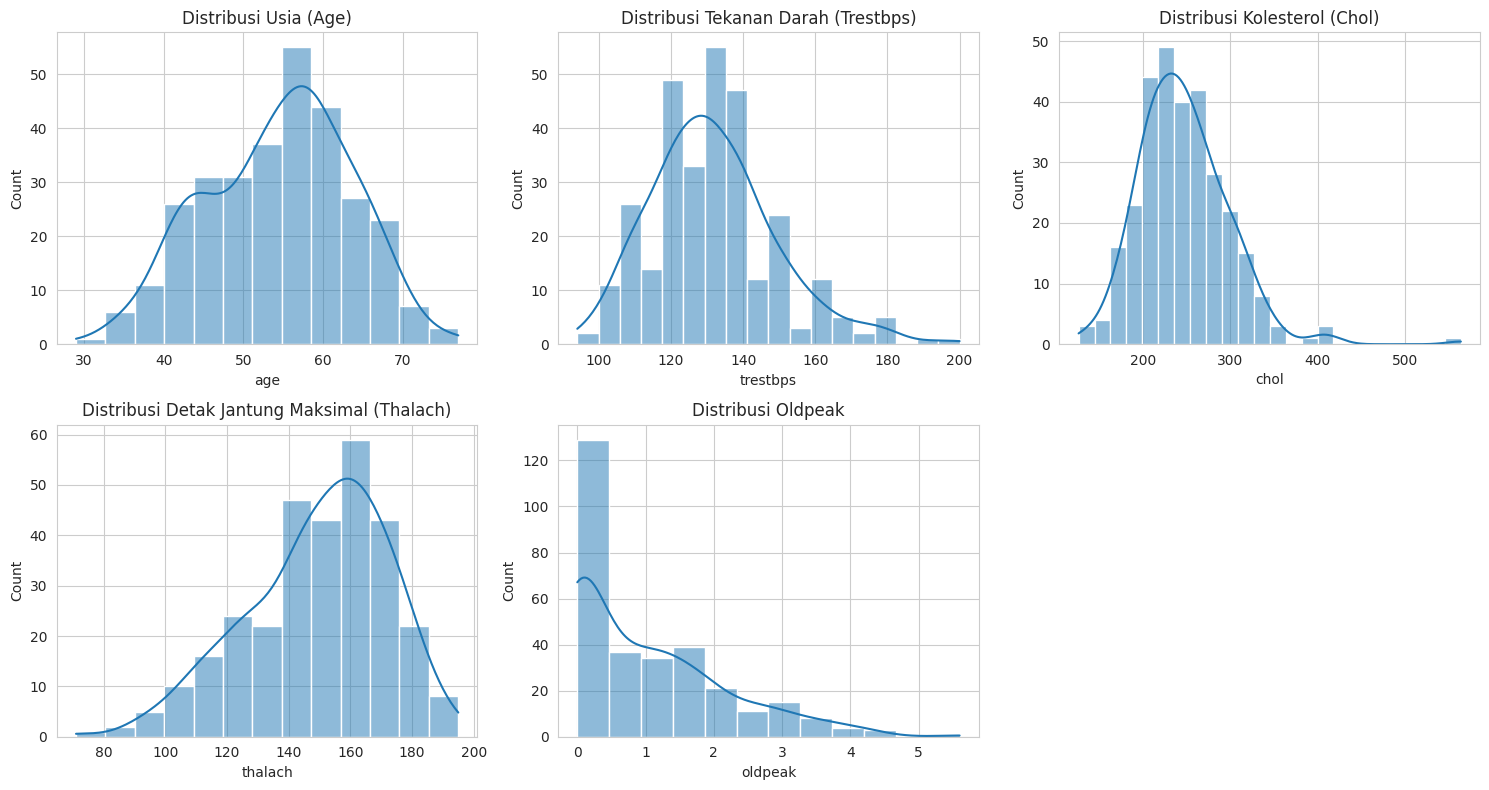

In [106]:
# Menyiapkan figure dan axes
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Menampilkan distribusi fitur 'age'
sns.histplot(df['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Usia (Age)')

# Menampilkan distribusi fitur 'trestbps'
sns.histplot(df['trestbps'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Tekanan Darah (Trestbps)')

# Menampilkan distribusi fitur 'chol'
sns.histplot(df['chol'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribusi Kolesterol (Chol)')

# Menampilkan distribusi fitur 'thalach'
sns.histplot(df['thalach'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Detak Jantung Maksimal (Thalach)')

# Menampilkan distribusi fitur 'oldpeak'
sns.histplot(df['oldpeak'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Oldpeak')

# Menghapus subplot yang tidak digunakan
fig.delaxes(axes[1, 2])

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari gambar distribusi yang ditunjukkan, fitur age yang hampir terlihat menyerupai distribusi normal. fitur lain seperti trestbps, chol, thalach dan oldpeak menunjukkan distribusi yang skew. Data menyebar dan kemungkinan itu bisa terjadi, karena ini pengukuran kondisi tubuh orang dalam keadaan sehat dan penderita penyakit jantung.

1. Ternyata banyak fitur yang tidak berdistribusi normal. Namun berdasarkan heatmap, korelasi antar fitur dengan targetnya. Kita bisa lebih memfokuskan pada fitur yang paling berpengaruh saja, dalam menentukan nilai-nilai pada data yang membuat distribusi itu tidak normal (ada nilai yang sangat rendah dan sangat tinggi) harus dipertahankan atau tidak.

2. Keputusan mempertahankan data yang membuat distribusi pada fitur-fitur tersebut juga bisa dilihat pada banyaknya data. Jumlah data yang minim karena nilai yang bisa dibilang sangat rendah dan sangat tinggi dihilangkan. Mampu membuat model juag berperforma rendah, karena model tidak terlalu banyak belajar dari data.

3. Karena data ini 302 dan konteksnya adalah deteksi penyakit, maka data data yang terindikasi outlier tersebut dipertahankan.

In [107]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Pilih hanya kolom-kolom numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Standarisasi semua kolom numerik
df[numeric_columns.columns] = scaler.fit_transform(numeric_columns)


In [108]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,age_group,ratio_BP,avg_BP_by_sex,fitness_level,avg_chol_by_sex,trestbps_category,cvd_risk_score,ratio_BP_Chol,glycemic_index,slope_risk
0,-0.267966,0.682656,-0.935208,-0.376556,-0.667728,-0.418446,0.901657,0.820375,-0.698344,-0.022452,...,Tua,-0.778064,-0.682656,0.765573,-0.682656,Elevated,-0.950680,0.276873,-0.783088,2.156053
1,-0.157260,0.682656,-0.935208,0.478910,-0.841918,2.389793,-1.002541,0.246821,1.431958,1.851114,...,Tua,-0.011807,-0.682656,0.203147,-0.682656,High BP Stage 2,-0.773928,1.063342,0.659423,-1.382686
2,1.724733,0.682656,-0.935208,0.764066,-1.403197,-0.418446,0.901657,-1.076765,1.431958,1.405027,...,Lansia,1.224260,-0.682656,-0.538943,-0.682656,High BP Stage 2,-0.066920,2.192958,-1.385456,-1.382686
3,0.728383,0.682656,-0.935208,0.935159,-0.841918,-0.418446,0.901657,0.511538,-0.698344,-0.914627,...,Lansia,0.065353,-0.682656,0.864027,-0.682656,High BP Stage 2,-0.674947,1.373180,-0.925754,0.976473
4,0.839089,-1.464866,-0.935208,0.364848,0.919336,2.389793,0.901657,-1.915036,-0.698344,0.780505,...,Lansia,1.907279,1.464866,-1.810433,1.464866,High BP Stage 1,1.806652,-0.668429,2.101935,0.976473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,-1.464866,1.005911,-0.661712,-0.687083,-0.418446,-1.002541,-1.517961,-0.698344,0.423635,...,Lansia,0.663345,1.464866,-1.139707,1.464866,Normal,0.611808,0.112537,-0.798940,-0.792896
733,-1.153610,-1.464866,1.005911,-1.346085,-2.041893,-0.418446,0.901657,1.129212,-0.698344,-0.379322,...,Tua,-1.388962,1.464866,0.721100,1.464866,Normal,-2.329347,1.663240,-1.908564,-0.792896
739,-0.267966,0.682656,-0.935208,-0.205463,0.164513,-0.418446,0.901657,0.511538,1.431958,-0.914627,...,Tua,-0.532638,-0.682656,0.439444,-0.682656,Elevated,-0.194181,-0.412336,-0.101462,0.976473
843,0.506972,0.682656,1.976470,1.619532,0.512893,-0.418446,-1.002541,-1.076765,-0.698344,-0.914627,...,Tua,1.801920,-0.682656,-0.984585,-0.682656,High BP Stage 2,1.021873,0.249025,0.183870,-0.203106
